<a href="https://colab.research.google.com/github/mwag9/SQL-for-Data-Analytics/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
#import libraries and .csv file
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
data = pd.read_csv(r'/content/medical_clean.csv')
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [266]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [267]:
#view data
list(data.columns)

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [268]:
data.isnull().sum()

,0
CaseOrder,0
Customer_id,0
Interaction,0
UID,0
City,0
State,0
County,0
Zip,0
Lat,0
Lng,0


In [269]:
#create list of features to insert into DataFrame and include in analysis
selected_columns = ['Area',
 'Age',
 'Income',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']
df = data[selected_columns]
df

,Area,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Suburban,53,86575.93,Male,No,19.141466,6,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,Urban,51,46805.99,Female,No,18.940352,4,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,Suburban,53,14370.14,Female,No,18.057507,4,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,Suburban,78,39741.49,Male,No,16.576858,4,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,Rural,22,1209.56,Female,No,17.439069,5,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Urban,25,45967.61,Male,No,16.980860,4,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,Urban,87,14983.02,Male,Yes,18.177020,5,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,Rural,45,65917.81,Female,Yes,17.129070,4,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,Rural,43,29702.32,Male,Yes,19.910430,5,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [270]:
df.describe()

,Age,Income,VitD_levels,Doc_visits,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,17.964262,5.012200,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,20.638538,28521.153293,2.017231,1.045734,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,18.000000,154.080000,9.806483,1.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,19598.775000,16.626439,4.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,53.000000,33768.420000,17.951122,5.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,71.000000,54296.402500,19.347963,6.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,89.000000,207249.100000,26.394449,9.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [271]:
#Rename columns in survey to more informative names
df.rename(columns = {'Item1':'Timely_Admission', 'Item2':'Timely_Treatment','Item3':'Timely_Visits','Item4':'Reliability','Item5':'Options','Item6':'Hours_Of_Tx','Item7':'Courteous_Staff','Item8':'Active_Listening'}, inplace = True)
print(df.columns)

Index(['Area', 'Age', 'Income', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Timely_Admission',
       'Timely_Treatment', 'Timely_Visits', 'Reliability', 'Options',
       'Hours_Of_Tx', 'Courteous_Staff', 'Active_Listening'],
      dtype='object')


<ipython-input-271-e07428ea41eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Item1':'Timely_Admission', 'Item2':'Timely_Treatment','Item3':'Timely_Visits','Item4':'Reliability','Item5':'Options','Item6':'Hours_Of_Tx','Item7':'Courteous_Staff','Item8':'Active_Listening'}, inplace = True)


In [272]:
#Create list of True/False 1/0 columns
binary_columns = [ 'ReAdmis','HighBlood',
 'Stroke','Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma']

#Create list of categorical columns
categorical_columns = [ 'Area',
 'Gender','Initial_admin',
 'Services', 'Complication_risk']


#Transform binary columns into boolean values
for col in binary_columns:
    df[col] = df[col].astype('category').cat.codes
df

<ipython-input-272-fec93e152e88>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes
<ipython-input-272-fec93e152e88>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes
<ipython-input-272-fec93e152e88>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Area,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening
0,Suburban,53,86575.93,Male,0,19.141466,6,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,Urban,51,46805.99,Female,0,18.940352,4,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,Suburban,53,14370.14,Female,0,18.057507,4,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,Suburban,78,39741.49,Male,0,16.576858,4,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,Rural,22,1209.56,Female,0,17.439069,5,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Urban,25,45967.61,Male,0,16.980860,4,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,Urban,87,14983.02,Male,1,18.177020,5,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,Rural,45,65917.81,Female,1,17.129070,4,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,Rural,43,29702.32,Male,1,19.910430,5,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [273]:
#view data
df.describe()

,Age,Income,ReAdmis,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,0.366900,17.964262,5.012200,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,20.638538,28521.153293,0.481983,2.017231,1.045734,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,18.000000,154.080000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,19598.775000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,53.000000,33768.420000,0.000000,17.951122,5.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,71.000000,54296.402500,1.000000,19.347963,6.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,89.000000,207249.100000,1.000000,26.394449,9.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [274]:
#convert boolean columns to integers
boolean_columns = df.columns[df.dtypes == 'bool']
df[boolean_columns] = df[boolean_columns].astype(int)
df

,Area,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening
0,Suburban,53,86575.93,Male,0,19.141466,6,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,Urban,51,46805.99,Female,0,18.940352,4,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,Suburban,53,14370.14,Female,0,18.057507,4,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,Suburban,78,39741.49,Male,0,16.576858,4,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,Rural,22,1209.56,Female,0,17.439069,5,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Urban,25,45967.61,Male,0,16.980860,4,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,Urban,87,14983.02,Male,1,18.177020,5,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,Rural,45,65917.81,Female,1,17.129070,4,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,Rural,43,29702.32,Male,1,19.910430,5,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


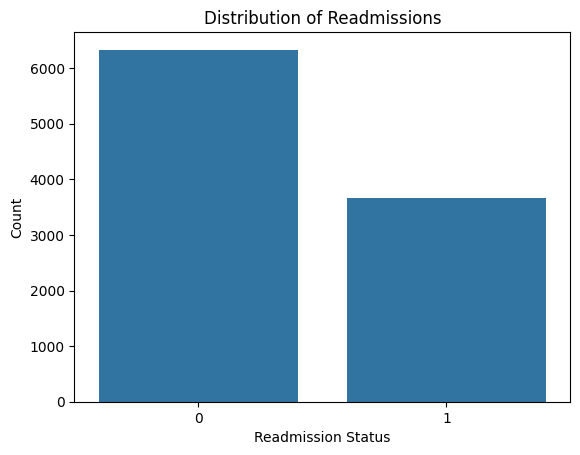

ReAdmis
0    6331
1    3669
Name: count, dtype: int64


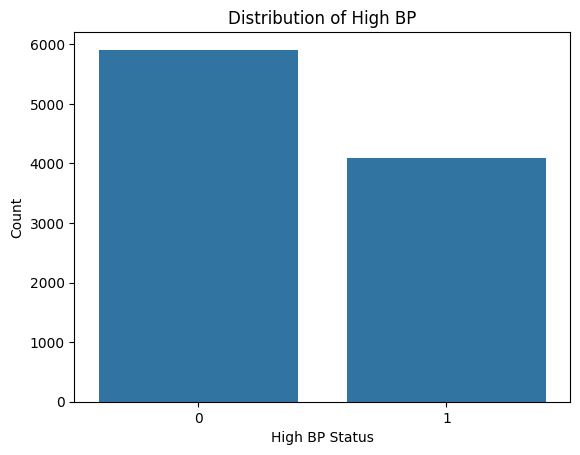

HighBlood
0    5910
1    4090
Name: count, dtype: int64
HighBlood vs. Readmission Status
+-------------+---------+---------+----------+
|  HighBlood  |    0    |    1    |   All    |
|-------------+---------+---------+----------|
|      0      | 3747.00 | 2163.00 | 5910.00  |
|      1      | 2584.00 | 1506.00 | 4090.00  |
|     All     | 6331.00 | 3669.00 | 10000.00 |
+-------------+---------+---------+----------+
HighBlood vs. Readmission Status Percentage Totals
ReAdmis        0      1
HighBlood              
0          37.47  21.63
1          25.84  15.06
HighBlood vs. Readmission Correlation
0.0022700537328705648


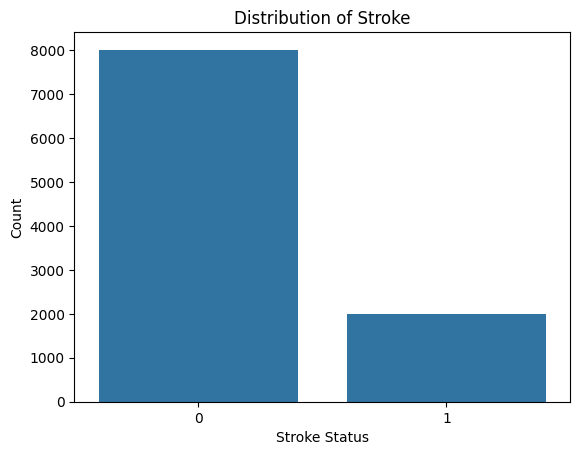

Stroke
0    8007
1    1993
Name: count, dtype: int64
Stroke vs. Readmission Status
+----------+---------+---------+----------+
|  Stroke  |    0    |    1    |   All    |
|----------+---------+---------+----------|
|    0     | 5071.00 | 2936.00 | 8007.00  |
|    1     | 1260.00 | 733.00  | 1993.00  |
|   All    | 6331.00 | 3669.00 | 10000.00 |
+----------+---------+---------+----------+
Stroke vs. Readmission Status Percentage Totals
ReAdmis      0      1
Stroke               
0        50.71  29.36
1        12.60   7.33
Stroke vs. Readmission Correlation
0.000918453917045823


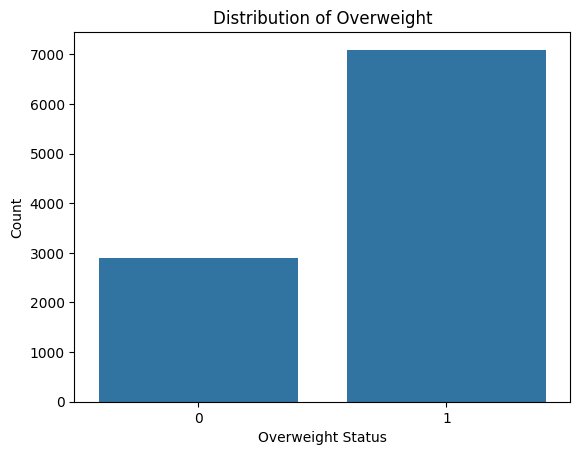

Overweight
1    7094
0    2906
Name: count, dtype: int64
Overweight vs. Readmission Status
+--------------+---------+---------+----------+
|  Overweight  |    0    |    1    |   All    |
|--------------+---------+---------+----------|
|      0       | 1821.00 | 1085.00 | 2906.00  |
|      1       | 4510.00 | 2584.00 | 7094.00  |
|     All      | 6331.00 | 3669.00 | 10000.00 |
+--------------+---------+---------+----------+
Overweight vs. Readmission Status Percentage Totals
ReAdmis         0      1
Overweight              
0           18.21  10.85
1           45.10  25.84
Overweight vs. Readmission Correlation
-0.008586002506313938


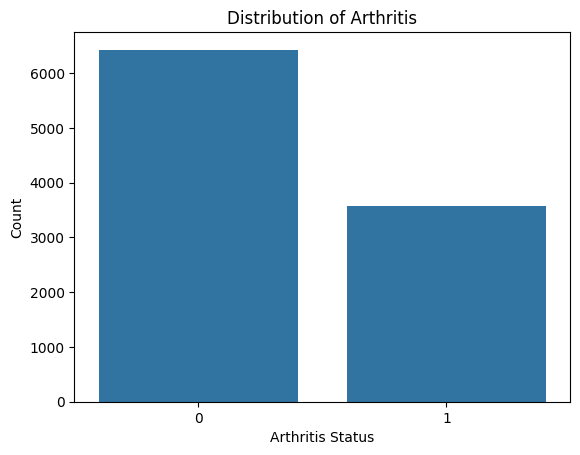

Arthritis
0    6426
1    3574
Name: count, dtype: int64
Arthritis vs. Readmission Status
+-------------+---------+---------+----------+
|  Arthritis  |    0    |    1    |   All    |
|-------------+---------+---------+----------|
|      0      | 4086.00 | 2340.00 | 6426.00  |
|      1      | 2245.00 | 1329.00 | 3574.00  |
|     All     | 6331.00 | 3669.00 | 10000.00 |
+-------------+---------+---------+----------+
Arthritis vs. Readmission Status Percentage Totals
ReAdmis        0      1
Arthritis              
0          40.86  23.40
1          22.45  13.29
Arthritis vs. Readmission Correlation
0.007663036548941211


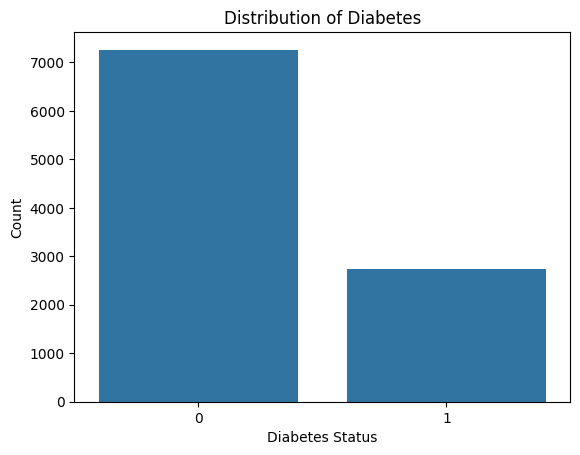

Diabetes
0    7262
1    2738
Name: count, dtype: int64
Diabetes vs. Readmission Status
+------------+---------+---------+----------+
|  Diabetes  |    0    |    1    |   All    |
|------------+---------+---------+----------|
|     0      | 4591.00 | 2671.00 | 7262.00  |
|     1      | 1740.00 | 998.00  | 2738.00  |
|    All     | 6331.00 | 3669.00 | 10000.00 |
+------------+---------+---------+----------+
Diabetes vs. Readmission Status Percentage Totals
ReAdmis       0      1
Diabetes              
0         45.91  26.71
1         17.40   9.98
Diabetes vs. Readmission Correlation
-0.0030581297963189324


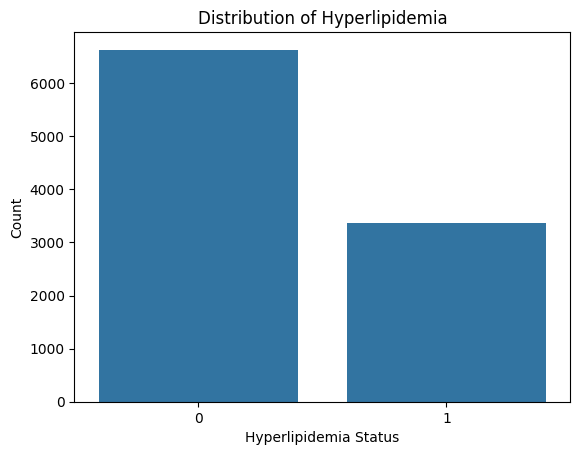

Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64
Hyperlipidemia vs. Readmission Status
+------------------+---------+---------+----------+
|  Hyperlipidemia  |    0    |    1    |   All    |
|------------------+---------+---------+----------|
|        0         | 4206.00 | 2422.00 | 6628.00  |
|        1         | 2125.00 | 1247.00 | 3372.00  |
|       All        | 6331.00 | 3669.00 | 10000.00 |
+------------------+---------+---------+----------+
Hyperlipidemia vs. Readmission Status Percentage Totals
ReAdmis             0      1
Hyperlipidemia              
0               42.06  24.22
1               21.25  12.47
Hyperlipidemia vs. Readmission Correlation
0.004306908097121832


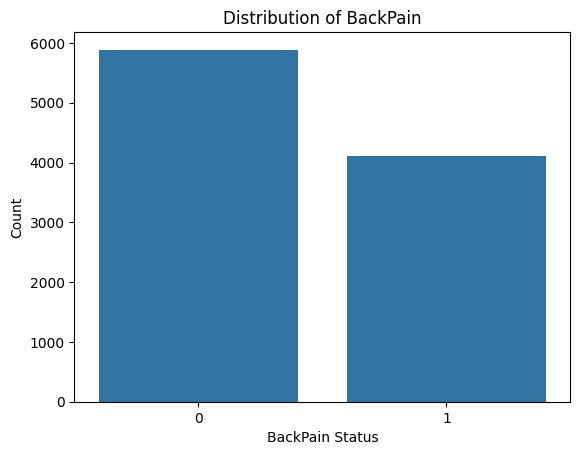

BackPain
0    5886
1    4114
Name: count, dtype: int64
BackPain vs. Readmission Status
+------------+---------+---------+----------+
|  BackPain  |    0    |    1    |   All    |
|------------+---------+---------+----------|
|     0      | 3758.00 | 2128.00 | 5886.00  |
|     1      | 2573.00 | 1541.00 | 4114.00  |
|    All     | 6331.00 | 3669.00 | 10000.00 |
+------------+---------+---------+----------+
BackPain vs. Readmission Status Percentage Totals
ReAdmis       0      1
BackPain              
0         37.58  21.28
1         25.73  15.41
BackPain vs. Readmission Correlation
0.01331278954320303


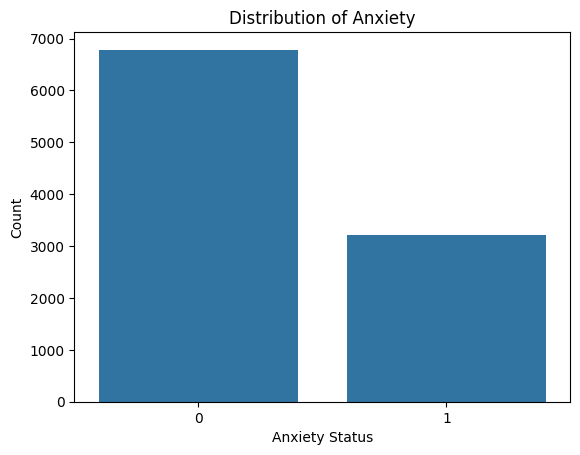

Anxiety
0    6785
1    3215
Name: count, dtype: int64
Anxiety vs. Readmission Status
+-----------+---------+---------+----------+
|  Anxiety  |    0    |    1    |   All    |
|-----------+---------+---------+----------|
|     0     | 4301.00 | 2484.00 | 6785.00  |
|     1     | 2030.00 | 1185.00 | 3215.00  |
|    All    | 6331.00 | 3669.00 | 10000.00 |
+-----------+---------+---------+----------+
Anxiety vs. Readmission Status Percentage Totals
ReAdmis      0      1
Anxiety              
0        43.01  24.84
1        20.30  11.85
Anxiety vs. Readmission Correlation
0.0024062642580067253


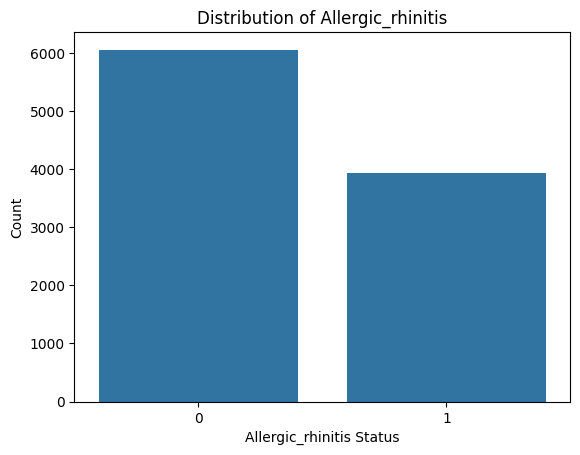

Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64
Allergic_rhinitis vs. Readmission Status
+---------------------+---------+---------+----------+
|  Allergic_rhinitis  |    0    |    1    |   All    |
|---------------------+---------+---------+----------|
|          0          | 3825.00 | 2234.00 | 6059.00  |
|          1          | 2506.00 | 1435.00 | 3941.00  |
|         All         | 6331.00 | 3669.00 | 10000.00 |
+---------------------+---------+---------+----------+
Allergic_rhinitis vs. Readmission Status Percentage Totals
ReAdmis                0      1
Allergic_rhinitis              
0                  38.25  22.34
1                  25.06  14.35
Allergic_rhinitis vs. Readmission Correlation
-0.004650668844673562


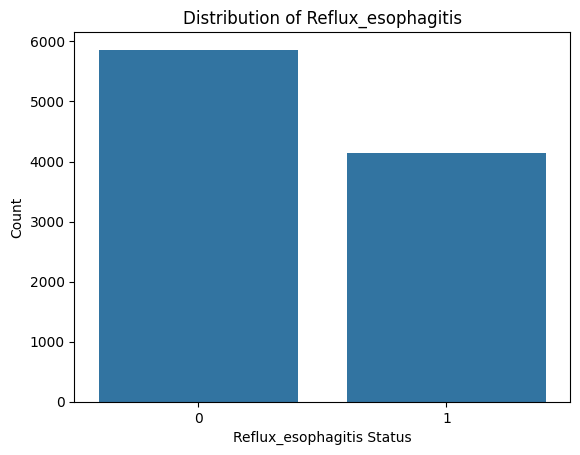

Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64
Reflux_esophagitis vs. Readmission Status
+----------------------+---------+---------+----------+
|  Reflux_esophagitis  |    0    |    1    |   All    |
|----------------------+---------+---------+----------|
|          0           | 3726.00 | 2139.00 | 5865.00  |
|          1           | 2605.00 | 1530.00 | 4135.00  |
|         All          | 6331.00 | 3669.00 | 10000.00 |
+----------------------+---------+---------+----------+
Reflux_esophagitis vs. Readmission Status Percentage Totals
ReAdmis                 0      1
Reflux_esophagitis              
0                   37.26  21.39
1                   26.05  15.30
Reflux_esophagitis vs. Readmission Correlation
0.005421833156015573


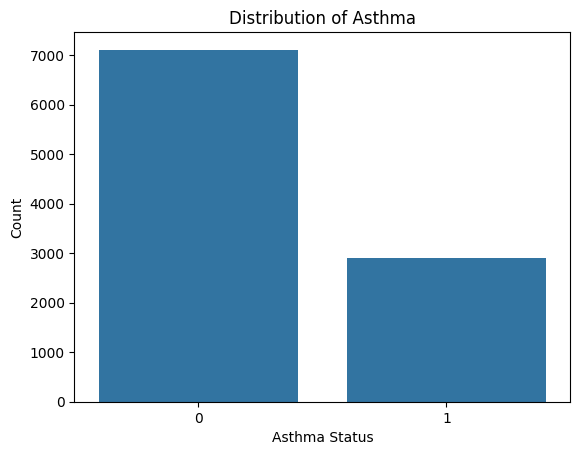

Asthma
0    7107
1    2893
Name: count, dtype: int64
Asthma vs. Readmission Status
+----------+---------+---------+----------+
|  Asthma  |    0    |    1    |   All    |
|----------+---------+---------+----------|
|    0     | 4462.00 | 2645.00 | 7107.00  |
|    1     | 1869.00 | 1024.00 | 2893.00  |
|   All    | 6331.00 | 3669.00 | 10000.00 |
+----------+---------+---------+----------+
Asthma vs. Readmission Status Percentage Totals
ReAdmis      0      1
Asthma               
0        44.62  26.45
1        18.69  10.24
Asthma vs. Readmission Correlation
-0.017132793168549723


In [275]:
#  binary variable summary stats
#Readmis bar chart (DEPENDENT VARIABLE)
sns.countplot(x='ReAdmis', data=df)
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.title('Distribution of Readmissions')
plt.show()

#Readmis frequency
frequency_table = df['ReAdmis'].value_counts(normalize=False)
print(frequency_table)


#HighBp bar chart
sns.countplot(x='HighBlood', data=df)
plt.xlabel('High BP Status')
plt.ylabel('Count')
plt.title('Distribution of High BP')
plt.show()

#HighBlood frequency
frequency_table = df['HighBlood'].value_counts(normalize=False)
print(frequency_table)

# Create the HighBlood contingency table
contingency_table = pd.crosstab(df['HighBlood'], df['ReAdmis'],margins=True)

# Format the HighBlood table using tabulate
print('HighBlood vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))


# Calculate HighBlood percentages
contingency_table_percentage = pd.crosstab(df['HighBlood'], df['ReAdmis'], normalize='all') * 100
print('HighBlood vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate HighBlood correlation with Readmission
print('HighBlood vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['HighBlood'])
print(correlation)

#Stroke bar chart
sns.countplot(x='Stroke', data=df)
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.title('Distribution of Stroke')
plt.show()

#Stroke frequency
frequency_table = df['Stroke'].value_counts(normalize=False)
print(frequency_table)

# Create the Stroke contingency table
contingency_table = pd.crosstab(df['Stroke'], df['ReAdmis'],margins=True)

# Format the Stroke table using tabulate
print('Stroke vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))


# Calculate Stroke percentages
contingency_table_percentage = pd.crosstab(df['Stroke'], df['ReAdmis'], normalize='all') * 100
print('Stroke vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Stroke correlation with Readmission
print('Stroke vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Stroke'])
print(correlation)

#Overweight bar chart
sns.countplot(x='Overweight', data=df)
plt.xlabel('Overweight Status')
plt.ylabel('Count')
plt.title('Distribution of Overweight')
plt.show()

#Overweight frequency
frequency_table = df['Overweight'].value_counts(normalize=False)
print(frequency_table)

# Create the Overweight contingency table
contingency_table = pd.crosstab(df['Overweight'], df['ReAdmis'],margins=True)

# Format the Overweight table using tabulate
print('Overweight vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Overweight percentages
contingency_table_percentage = pd.crosstab(df['Overweight'], df['ReAdmis'], normalize='all') * 100
print('Overweight vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Overweight correlation with Readmission
print('Overweight vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Overweight'])
print(correlation)

#Arthritis bar chart
sns.countplot(x='Arthritis', data=df)
plt.xlabel('Arthritis Status')
plt.ylabel('Count')
plt.title('Distribution of Arthritis')
plt.show()

#Arthritis frequency
frequency_table = df['Arthritis'].value_counts(normalize=False)
print(frequency_table)

# Create the Arthritis contingency table
contingency_table = pd.crosstab(df['Arthritis'], df['ReAdmis'],margins=True)

# Format the Arthritis table using tabulate
print('Arthritis vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Arthritis percentages
contingency_table_percentage = pd.crosstab(df['Arthritis'], df['ReAdmis'], normalize='all') * 100
print('Arthritis vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Arthritis correlation with Readmission
print('Arthritis vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Arthritis'])
print(correlation)

#Diabetes bar chart
sns.countplot(x='Diabetes', data=df)
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')
plt.show()

#Diabetes frequency
frequency_table = df['Diabetes'].value_counts(normalize=False)
print(frequency_table)

# Create the Diabetes contingency table
contingency_table = pd.crosstab(df['Diabetes'], df['ReAdmis'],margins=True)

# Format the Diabetes table using tabulate
print('Diabetes vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Diabetes percentages
contingency_table_percentage = pd.crosstab(df['Diabetes'], df['ReAdmis'], normalize='all') * 100
print('Diabetes vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Diabetes correlation with Readmission
print('Diabetes vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Diabetes'])
print(correlation)

#Hyperlipidemia bar chart
sns.countplot(x='Hyperlipidemia', data=df)
plt.xlabel('Hyperlipidemia Status')
plt.ylabel('Count')
plt.title('Distribution of Hyperlipidemia')
plt.show()

#Hyperlipidemia frequency
frequency_table = df['Hyperlipidemia'].value_counts(normalize=False)
print(frequency_table)

# Create the Hyperlipidemia contingency table
contingency_table = pd.crosstab(df['Hyperlipidemia'], df['ReAdmis'],margins=True)

# Format the Hyperlipidemia table using tabulate
print('Hyperlipidemia vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Hyperlipidemia percentages
contingency_table_percentage = pd.crosstab(df['Hyperlipidemia'], df['ReAdmis'], normalize='all') * 100
print('Hyperlipidemia vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Hyperlipidemia correlation with Readmission
print('Hyperlipidemia vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Hyperlipidemia'])
print(correlation)

#BackPain bar chart
sns.countplot(x='BackPain', data=df)
plt.xlabel('BackPain Status')
plt.ylabel('Count')
plt.title('Distribution of BackPain')
plt.show()

#BackPain frequency
frequency_table = df['BackPain'].value_counts(normalize=False)
print(frequency_table)

# Create the BackPain contingency table
contingency_table = pd.crosstab(df['BackPain'], df['ReAdmis'],margins=True)

# Format the BackPain table using tabulate
print('BackPain vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate BackPain percentages
contingency_table_percentage = pd.crosstab(df['BackPain'], df['ReAdmis'], normalize='all') * 100
print('BackPain vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate BackPain correlation with Readmission
print('BackPain vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['BackPain'])
print(correlation)

#Anxiety bar chart
sns.countplot(x='Anxiety', data=df)
plt.xlabel('Anxiety Status')
plt.ylabel('Count')
plt.title('Distribution of Anxiety')
plt.show()

#Anxiety frequency
frequency_table = df['Anxiety'].value_counts(normalize=False)
print(frequency_table)

# Create the Anxiety contingency table
contingency_table = pd.crosstab(df['Anxiety'], df['ReAdmis'],margins=True)

# Format the Anxiety table using tabulate
print('Anxiety vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Anxiety percentages
contingency_table_percentage = pd.crosstab(df['Anxiety'], df['ReAdmis'], normalize='all') * 100
print('Anxiety vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Anxiety correlation with Readmission
print('Anxiety vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Anxiety'])
print(correlation)

#Allergic_rhinitis bar chart
sns.countplot(x='Allergic_rhinitis', data=df)
plt.xlabel('Allergic_rhinitis Status')
plt.ylabel('Count')
plt.title('Distribution of Allergic_rhinitis')
plt.show()

#Allergic_rhinitis frequency
frequency_table = df['Allergic_rhinitis'].value_counts(normalize=False)
print(frequency_table)

# Create the Allergic_rhinitis contingency table
contingency_table = pd.crosstab(df['Allergic_rhinitis'], df['ReAdmis'],margins=True)

# Format the Allergic_rhinitis table using tabulate
print('Allergic_rhinitis vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Allergic_rhinitis percentages
contingency_table_percentage = pd.crosstab(df['Allergic_rhinitis'], df['ReAdmis'], normalize='all') * 100
print('Allergic_rhinitis vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)


# Calculate Allergic_rhinitis correlation with Readmission
print('Allergic_rhinitis vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Allergic_rhinitis'])
print(correlation)

#Reflux_esophagitis bar chart
sns.countplot(x='Reflux_esophagitis', data=df)
plt.xlabel('Reflux_esophagitis Status')
plt.ylabel('Count')
plt.title('Distribution of Reflux_esophagitis')
plt.show()

#Reflux_esophagitis frequency
frequency_table = df['Reflux_esophagitis'].value_counts(normalize=False)
print(frequency_table)

# Create the Reflux_esophagitis contingency table
contingency_table = pd.crosstab(df['Reflux_esophagitis'], df['ReAdmis'],margins=True)

# Format the Reflux_esophagitis table using tabulate
print('Reflux_esophagitis vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Reflux_esophagitis percentages
contingency_table_percentage = pd.crosstab(df['Reflux_esophagitis'], df['ReAdmis'], normalize='all') * 100
print('Reflux_esophagitis vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Reflux_esophagitis correlation with Readmission
print('Reflux_esophagitis vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Reflux_esophagitis'])
print(correlation)

#Asthma bar chart
sns.countplot(x='Asthma', data=df)
plt.xlabel('Asthma Status')
plt.ylabel('Count')
plt.title('Distribution of Asthma')
plt.show()

#Asthma frequency
frequency_table = df['Asthma'].value_counts(normalize=False)
print(frequency_table)

# Create the Asthma contingency table
contingency_table = pd.crosstab(df['Asthma'], df['ReAdmis'],margins=True)

# Format the Asthma table using tabulate
print('Asthma vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Asthma percentages
contingency_table_percentage = pd.crosstab(df['Asthma'], df['ReAdmis'], normalize='all') * 100
print('Asthma vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

# Calculate Asthma correlation with Readmission
print('Asthma vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Asthma'])
print(correlation)


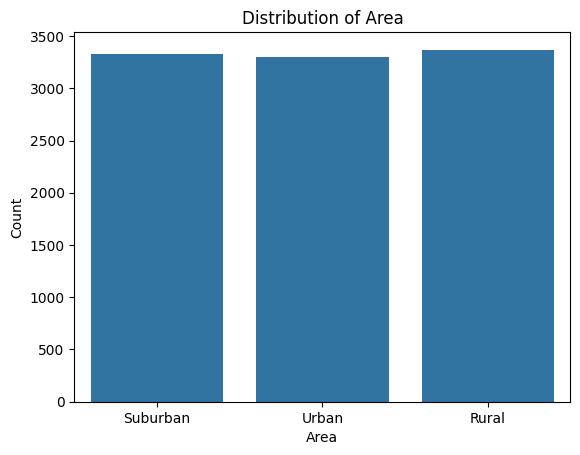

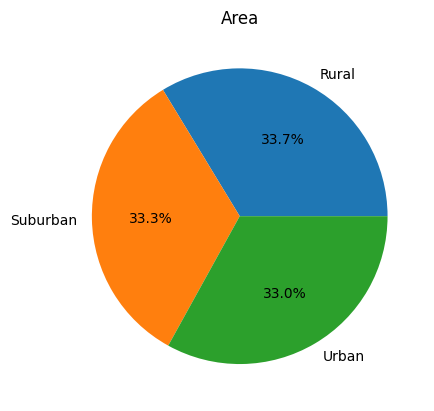

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64


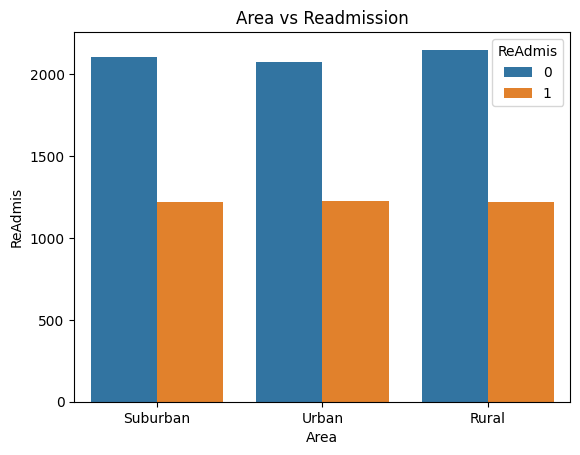

Area vs. Readmission Status
+----------+---------+---------+----------+
|   Area   |    0    |    1    |   All    |
|----------+---------+---------+----------|
|  Rural   | 2150.00 | 1219.00 | 3369.00  |
| Suburban | 2106.00 | 1222.00 | 3328.00  |
|  Urban   | 2075.00 | 1228.00 | 3303.00  |
|   All    | 6331.00 | 3669.00 | 10000.00 |
+----------+---------+---------+----------+
Area vs. Readmission Status Percentage Totals
ReAdmis       0      1
Area                  
Rural     21.50  12.19
Suburban  21.06  12.22
Urban     20.75  12.28


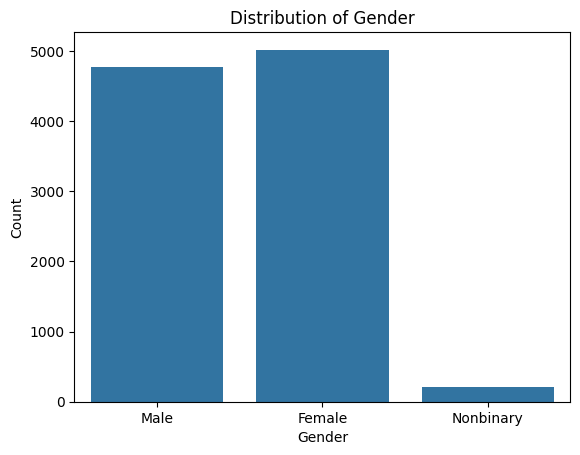

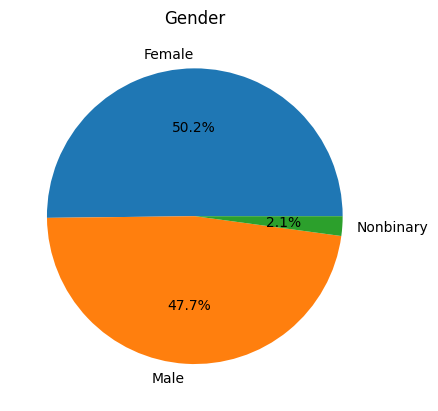

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64


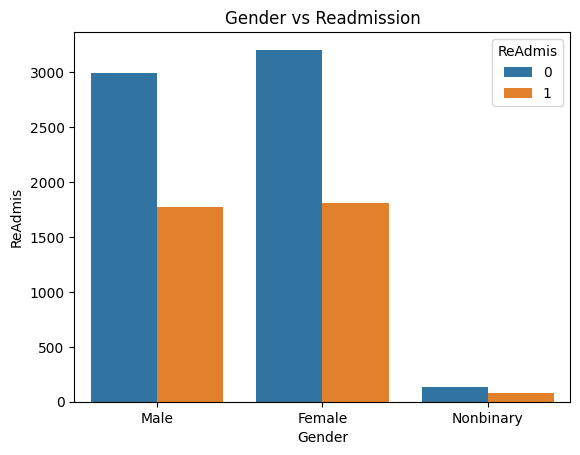

Gender vs. Readmission Status
+-----------+---------+---------+----------+
|  Gender   |    0    |    1    |   All    |
|-----------+---------+---------+----------|
|  Female   | 3205.00 | 1813.00 | 5018.00  |
|   Male    | 2995.00 | 1773.00 | 4768.00  |
| Nonbinary | 131.00  |  83.00  |  214.00  |
|    All    | 6331.00 | 3669.00 | 10000.00 |
+-----------+---------+---------+----------+
Gender vs. Readmission Status Percentage Totals
ReAdmis        0      1
Gender                 
Female     32.05  18.13
Male       29.95  17.73
Nonbinary   1.31   0.83


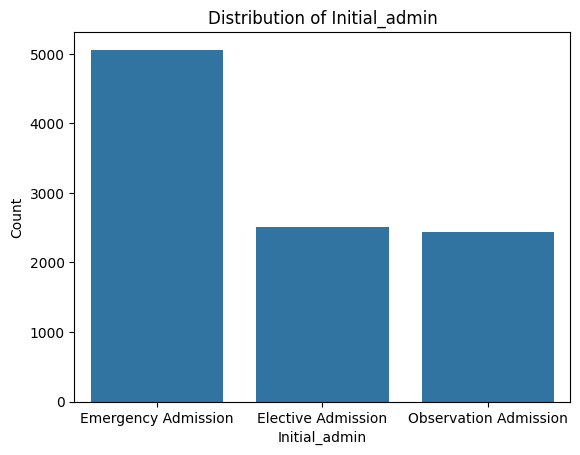

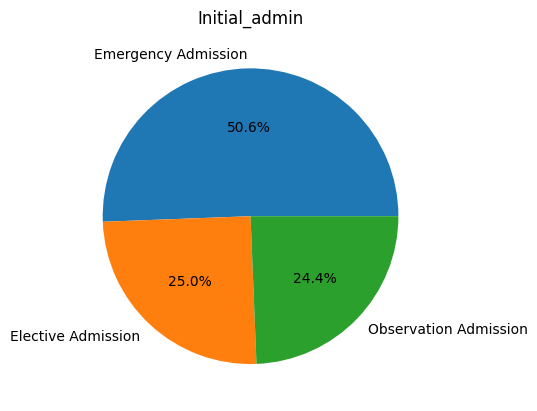

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64


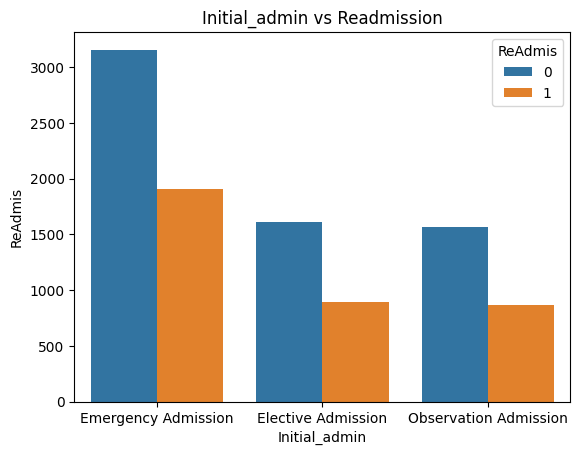

Initial_admin vs. Readmission Status
+-----------------------+---------+---------+----------+
|     Initial_admin     |    0    |    1    |   All    |
|-----------------------+---------+---------+----------|
|  Elective Admission   | 1608.00 | 896.00  | 2504.00  |
|  Emergency Admission  | 3156.00 | 1904.00 | 5060.00  |
| Observation Admission | 1567.00 | 869.00  | 2436.00  |
|          All          | 6331.00 | 3669.00 | 10000.00 |
+-----------------------+---------+---------+----------+
Initial_admin vs. Readmission Status Percentage Totals
ReAdmis                    0      1
Initial_admin                      
Elective Admission     16.08   8.96
Emergency Admission    31.56  19.04
Observation Admission  15.67   8.69


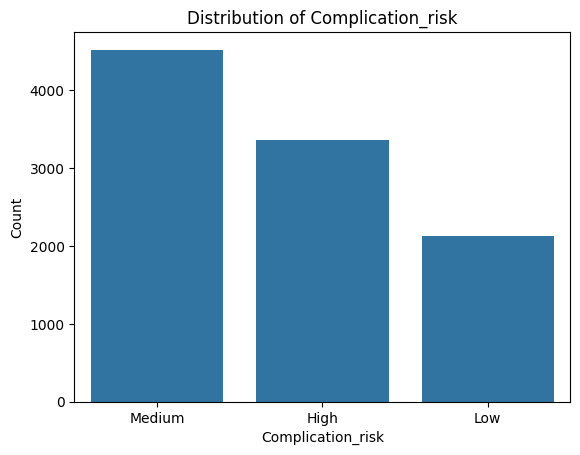

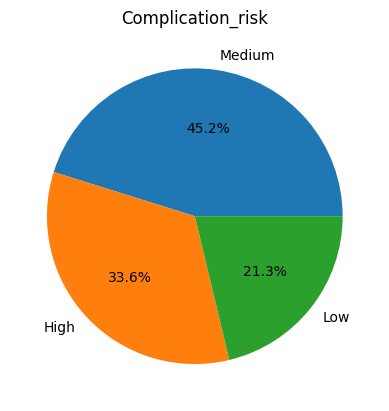

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64


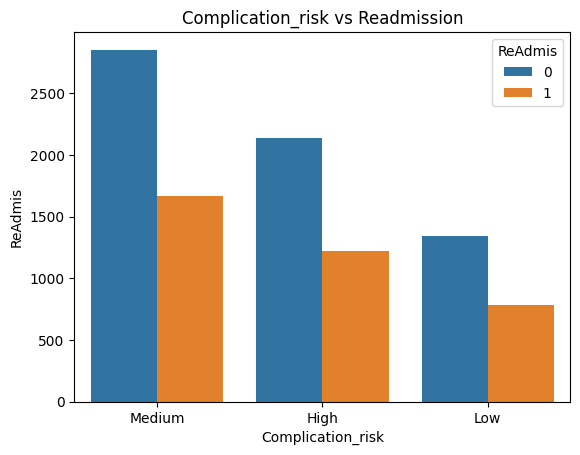

Complication_risk vs. Readmission Status
+---------------------+---------+---------+----------+
|  Complication_risk  |    0    |    1    |   All    |
|---------------------+---------+---------+----------|
|        High         | 2135.00 | 1223.00 | 3358.00  |
|         Low         | 1343.00 | 782.00  | 2125.00  |
|       Medium        | 2853.00 | 1664.00 | 4517.00  |
|         All         | 6331.00 | 3669.00 | 10000.00 |
+---------------------+---------+---------+----------+
Complication_risk vs. Readmission Status Percentage Totals
ReAdmis                0      1
Complication_risk              
High               21.35  12.23
Low                13.43   7.82
Medium             28.53  16.64


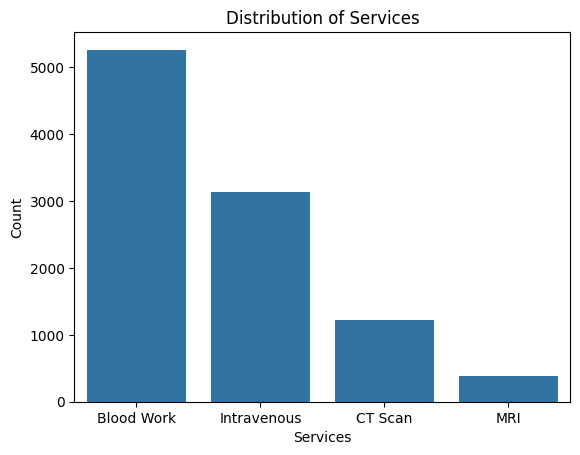

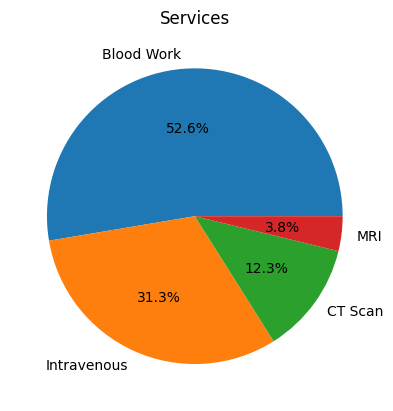

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64


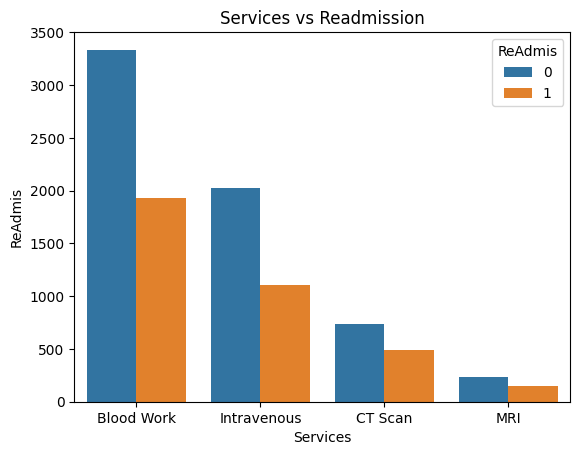

Services vs. Readmission Status
+-------------+---------+---------+----------+
|  Services   |    0    |    1    |   All    |
|-------------+---------+---------+----------|
| Blood Work  | 3335.00 | 1930.00 | 5265.00  |
|   CT Scan   | 737.00  | 488.00  | 1225.00  |
| Intravenous | 2027.00 | 1103.00 | 3130.00  |
|     MRI     | 232.00  | 148.00  |  380.00  |
|     All     | 6331.00 | 3669.00 | 10000.00 |
+-------------+---------+---------+----------+
Services vs. Readmission Status Percentage Totals
ReAdmis          0      1
Services                 
Blood Work   33.35  19.30
CT Scan       7.37   4.88
Intravenous  20.27  11.03
MRI           2.32   1.48


In [276]:
#categorical feature summary stats

#Area bar chart
sns.countplot(x='Area', data=df)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

#Area pie chart
servCount = df['Area'].value_counts()
plt.pie(servCount, labels=servCount.index, autopct='%1.1f%%')
plt.title('Area')
plt.show()

#Area counts
fig = df['Area']. value_counts()
print(fig)

#Area bivariate chart
sns.countplot(x='Area', hue='ReAdmis', data=df)
plt.xlabel('Area')
plt.ylabel('ReAdmis')
plt.title('Area vs Readmission')
plt.show()

# Create the Area contingency table
contingency_table = pd.crosstab(df['Area'], df['ReAdmis'],margins=True)

# Format the Area table using tabulate
print('Area vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Area percentages
contingency_table_percentage = pd.crosstab(df['Area'], df['ReAdmis'], normalize='all') * 100
print('Area vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)


#Gender bar chart
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

#Gender pie chart
servCount = df['Gender'].value_counts()
plt.pie(servCount, labels=servCount.index, autopct='%1.1f%%')
plt.title('Gender')
plt.show()

#Gender counts
fig = df['Gender']. value_counts()
print(fig)

#Gender bivariate chart
sns.countplot(x='Gender', hue='ReAdmis', data=df)
plt.xlabel('Gender')
plt.ylabel('ReAdmis')
plt.title('Gender vs Readmission')
plt.show()

# Create the Gender contingency table
contingency_table = pd.crosstab(df['Gender'], df['ReAdmis'],margins=True)

# Format the Gender table using tabulate
print('Gender vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Gender percentages
contingency_table_percentage = pd.crosstab(df['Gender'], df['ReAdmis'], normalize='all') * 100
print('Gender vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

#Initial_admin bar chart
sns.countplot(x='Initial_admin', data=df)
plt.xlabel('Initial_admin')
plt.ylabel('Count')
plt.title('Distribution of Initial_admin')
plt.show()

#Initial_admin pie chart
servCount = df['Initial_admin'].value_counts()
plt.pie(servCount, labels=servCount.index, autopct='%1.1f%%')
plt.title('Initial_admin')
plt.show()

#Initial_admin counts
fig = df['Initial_admin']. value_counts()
print(fig)

#Initial_admin bivariate chart
sns.countplot(x='Initial_admin', hue='ReAdmis', data=df)
plt.xlabel('Initial_admin')
plt.ylabel('ReAdmis')
plt.title('Initial_admin vs Readmission')
plt.show()

# Create the Initial_admin contingency table
contingency_table = pd.crosstab(df['Initial_admin'], df['ReAdmis'],margins=True)

# Format the Initial_admin table using tabulate
print('Initial_admin vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Initial_admin percentages
contingency_table_percentage = pd.crosstab(df['Initial_admin'], df['ReAdmis'], normalize='all') * 100
print('Initial_admin vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

#Complication_risk bar chart
sns.countplot(x='Complication_risk', data=df)
plt.xlabel('Complication_risk')
plt.ylabel('Count')
plt.title('Distribution of Complication_risk')
plt.show()

#Complication_risk pie chart
servCount = df['Complication_risk'].value_counts()
plt.pie(servCount, labels=servCount.index, autopct='%1.1f%%')
plt.title('Complication_risk')
plt.show()

#Complication_risk counts
fig = df['Complication_risk']. value_counts()
print(fig)

#Complication_risk bivariate chart
sns.countplot(x='Complication_risk', hue='ReAdmis', data=df)
plt.xlabel('Complication_risk')
plt.ylabel('ReAdmis')
plt.title('Complication_risk vs Readmission')
plt.show()

# Create the Complication_risk contingency table
contingency_table = pd.crosstab(df['Complication_risk'], df['ReAdmis'],margins=True)

# Format the Complication_risk table using tabulate
print('Complication_risk vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Complication_risk percentages
contingency_table_percentage = pd.crosstab(df['Complication_risk'], df['ReAdmis'], normalize='all') * 100
print('Complication_risk vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

#Services bar chart
sns.countplot(x='Services', data=df)
plt.xlabel('Services')
plt.ylabel('Count')
plt.title('Distribution of Services')
plt.show()

#Services pie chart
servCount = df['Services'].value_counts()
plt.pie(servCount, labels=servCount.index, autopct='%1.1f%%')
plt.title('Services')
plt.show()

#Services counts
fig = df['Services']. value_counts()
print(fig)

#Services bivariate chart
sns.countplot(x='Services', hue='ReAdmis', data=df)
plt.xlabel('Services')
plt.ylabel('ReAdmis')
plt.title('Services vs Readmission')
plt.show()

# Create the Services contingency table
contingency_table = pd.crosstab(df['Services'], df['ReAdmis'],margins=True)

# Format the Services table using tabulate
print('Services vs. Readmission Status')
print(tabulate(contingency_table, headers='keys', tablefmt='psql',showindex="always",floatfmt=".2f",numalign="center",stralign='center'))

# Calculate Services percentages
contingency_table_percentage = pd.crosstab(df['Services'], df['ReAdmis'], normalize='all') * 100
print('Services vs. Readmission Status Percentage Totals')
print(contingency_table_percentage)

In [277]:
#perform hot one encoding on categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df
#convert boolean columns to integers
boolean_columns = df.columns[df.dtypes == 'bool']
df[boolean_columns] = df[boolean_columns].astype(int)
df

,Age,Income,ReAdmis,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
0,53,86575.93,0,19.141466,6,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,1,0,1,0,1,0,0,0,0,0,1
1,51,46805.99,0,18.940352,4,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,0,1,0,0,1,0,0,1,0,0,0
2,53,14370.14,0,18.057507,4,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,1,0,0,0,0,0,0,0,0,0,1
3,78,39741.49,0,16.576858,4,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1,0,1,0,0,0,0,0,0,0,1
4,22,1209.56,0,17.439069,5,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,0,16.980860,4,1,0,0,0,0,0,0,1,0,1,0,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
9996,87,14983.02,1,18.177020,5,1,0,1,1,1,0,0,0,0,0,1,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,0,1,1,0,0,0,1,0,0,0,1
9997,45,65917.81,1,17.129070,4,1,0,1,0,0,0,0,1,1,0,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,0,0,0,0,0,0,0,1,0,0,0
9998,43,29702.32,1,19.910430,5,0,0,1,0,0,0,1,0,0,0,0,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,0,0,1,0,1,0,0,0,0,0,1


TotalCharge summary stats
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64


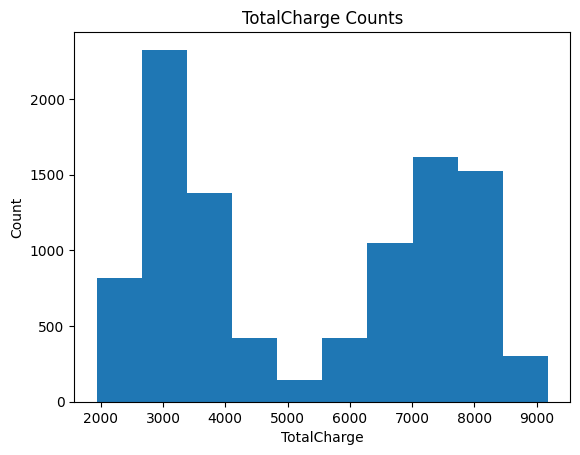

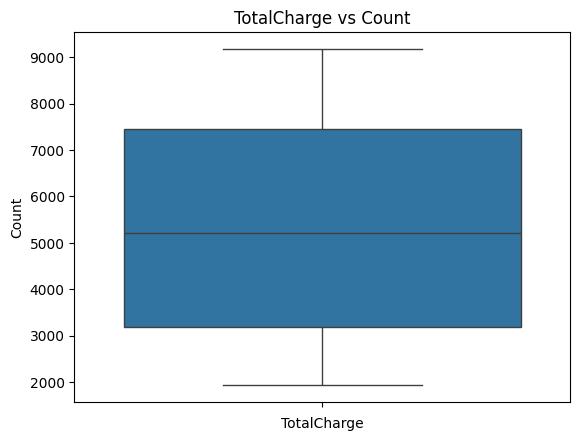

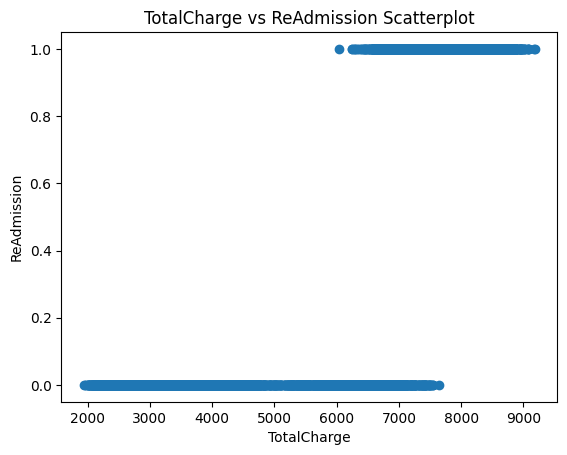

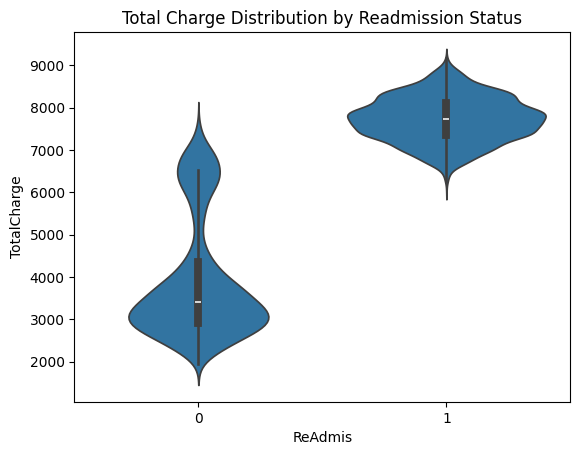

TotalCharge vs. Readmission Correlation
0.8437258683249471
Income summary stats
count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


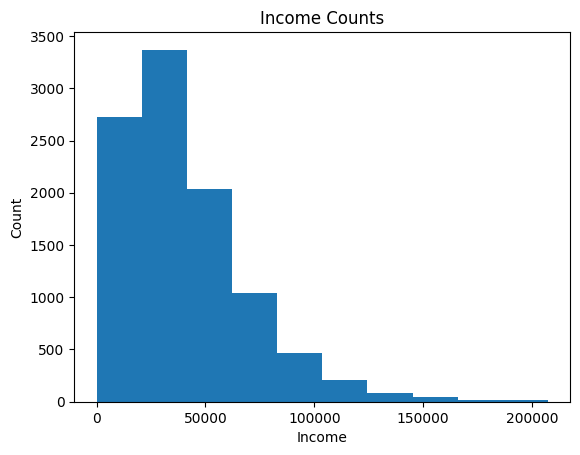

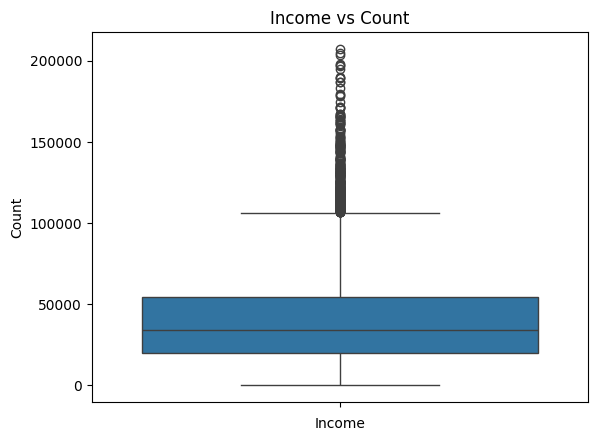

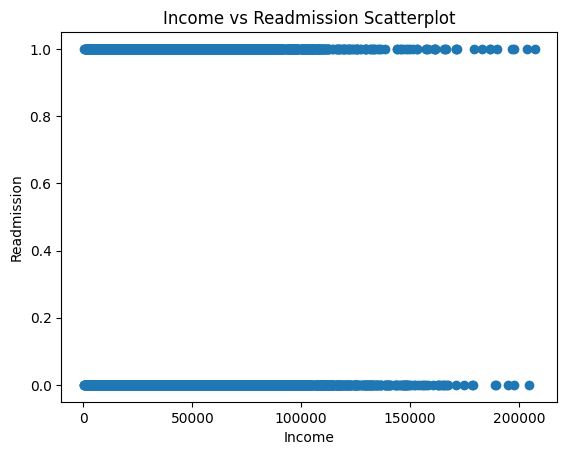

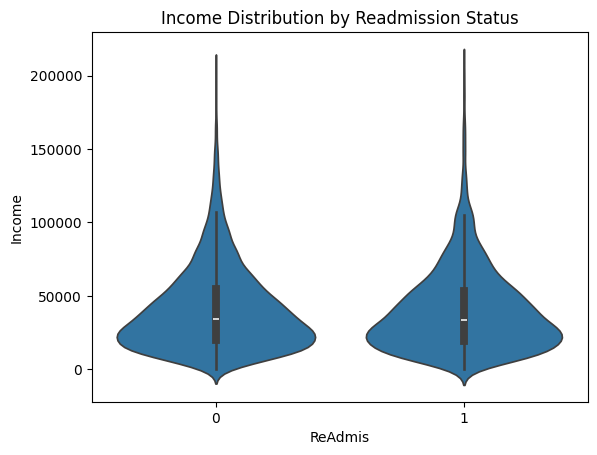

Income vs. Readmission Correlation
-0.011503849976310843
Vitamin D summary stats
count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


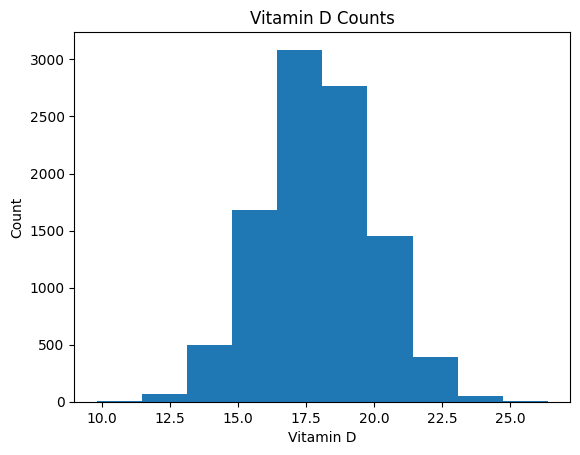

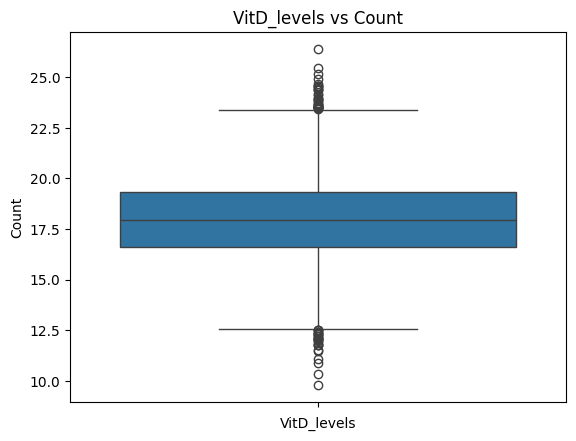

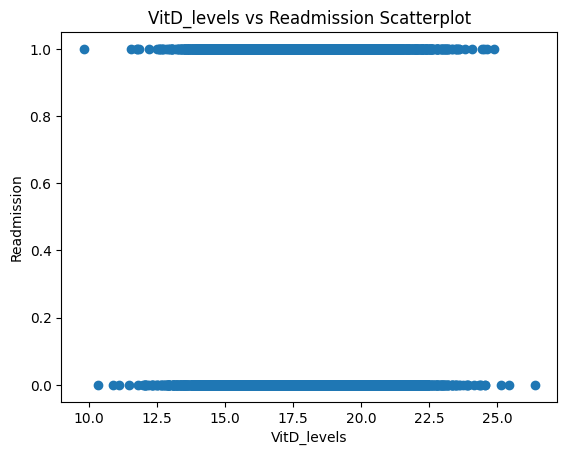

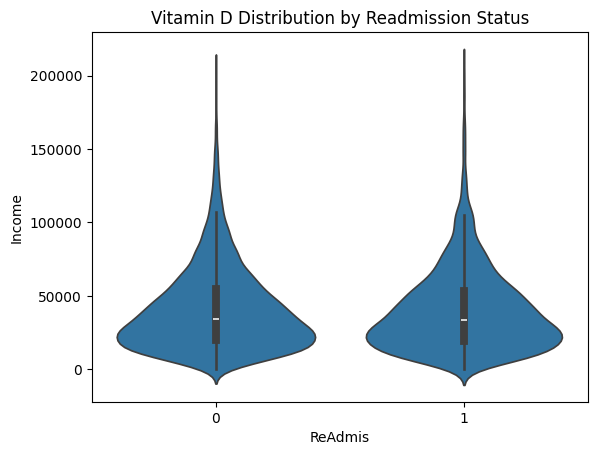

VitD_levels vs. Readmission Correlation
0.004082587790718823
Initial Days summary stats
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


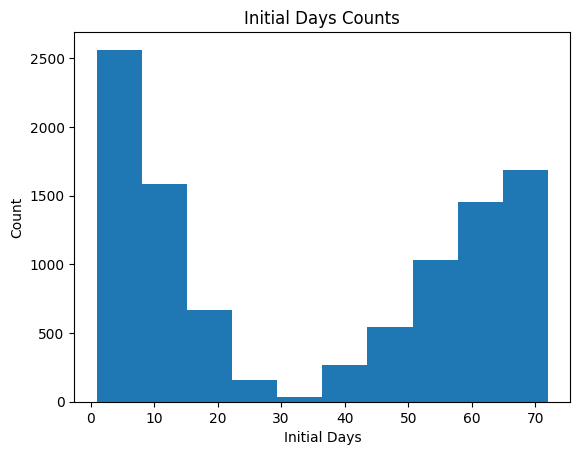

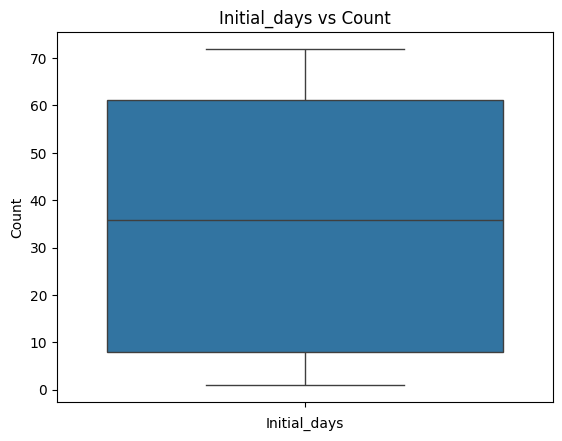

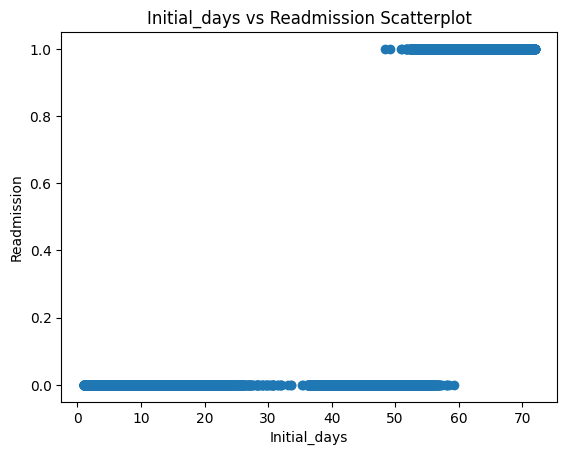

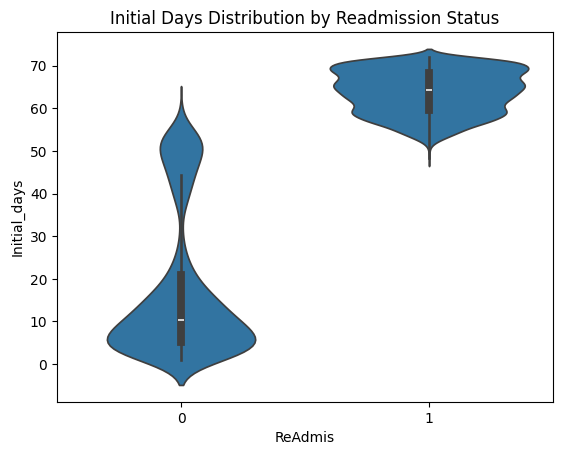

Initial_days vs. Readmission Correlation
0.8508616016470899
Additional Charges summary stats
count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64


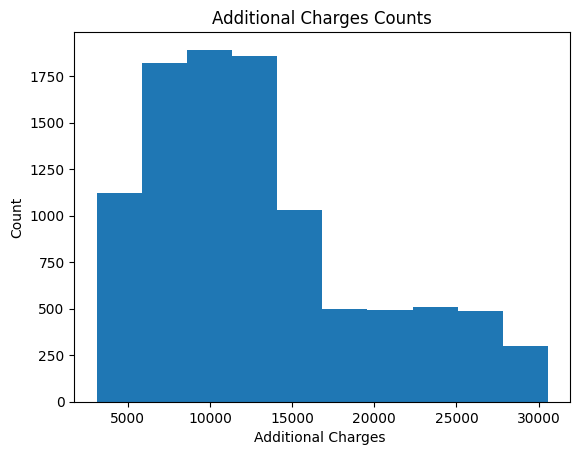

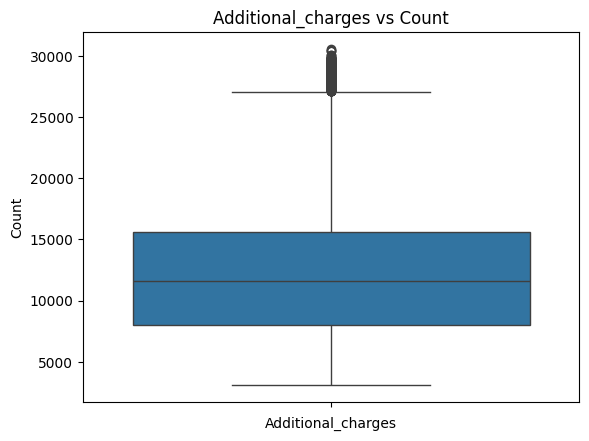

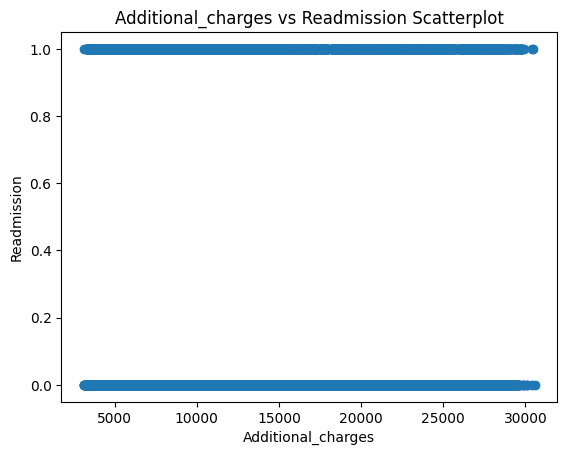

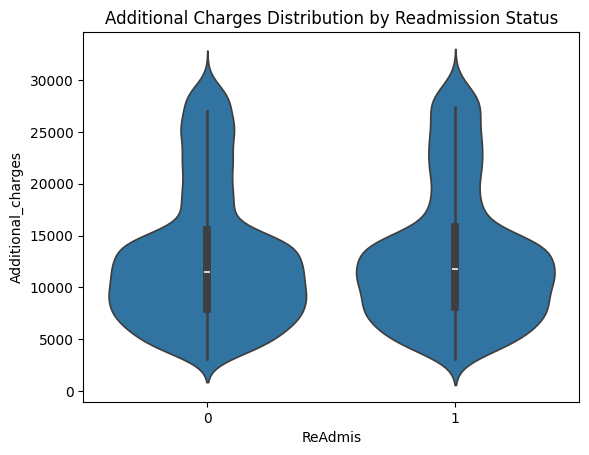

Additional_charges vs. Readmission Correlation
0.013619831292723409
Doc Visits summary stats
count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64


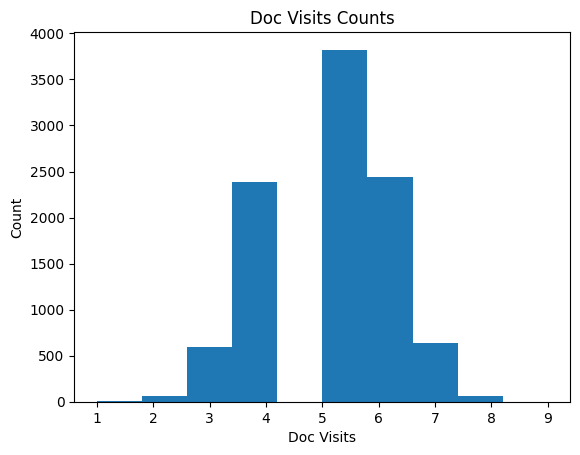

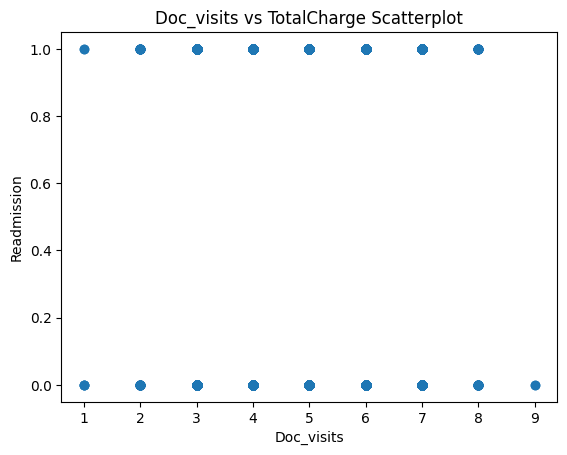

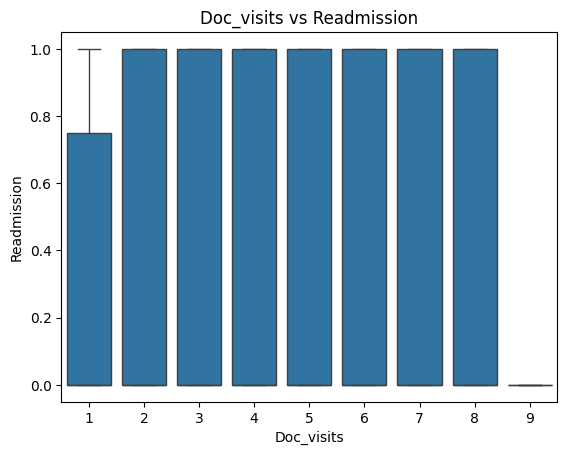

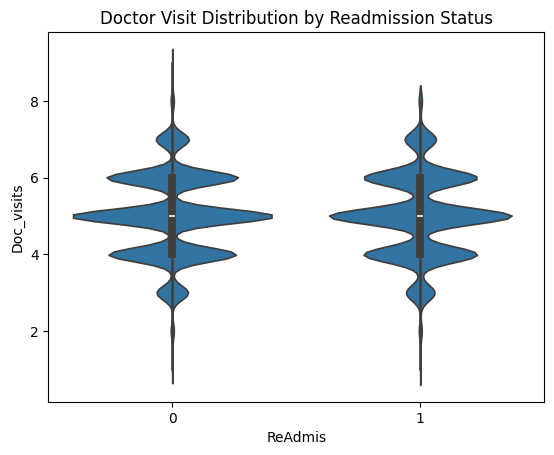

Doc_visits vs. Readmission Correlation
0.0002456863861361553
Timely Admission summary stats
count    10000.000000
mean         3.518800
std          1.031966
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Timely_Admission, dtype: float64


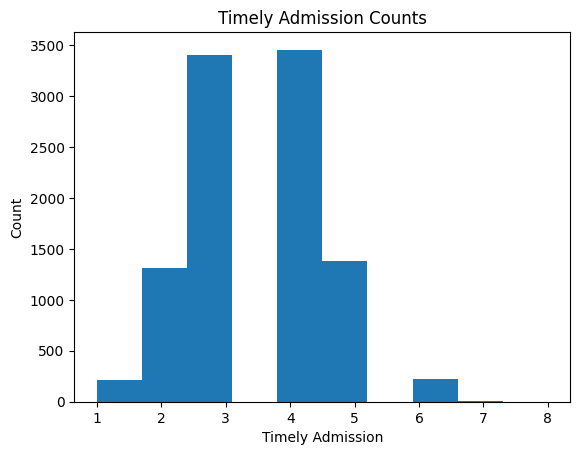

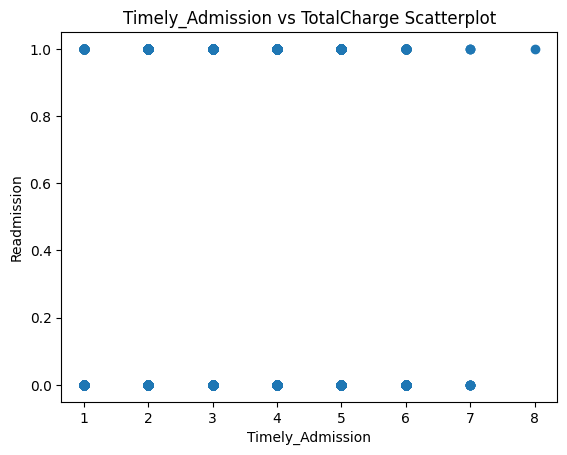

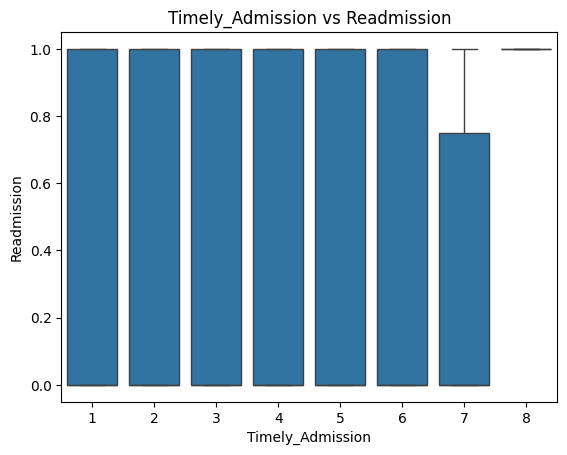

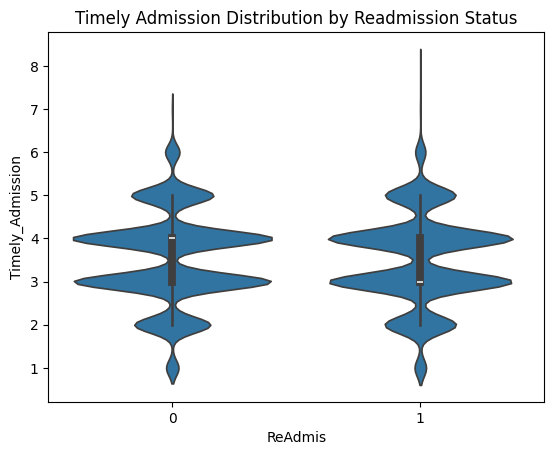

Timely_Admission vs. Readmission Correlation
-0.016784729427090053
Timely Treatment summary stats
count    10000.000000
mean         3.506700
std          1.034825
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Timely_Treatment, dtype: float64


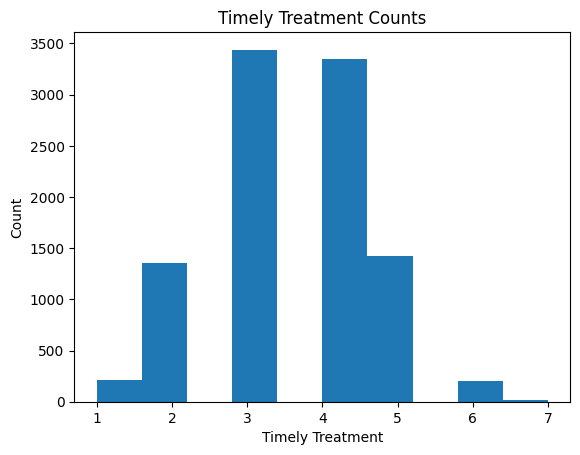

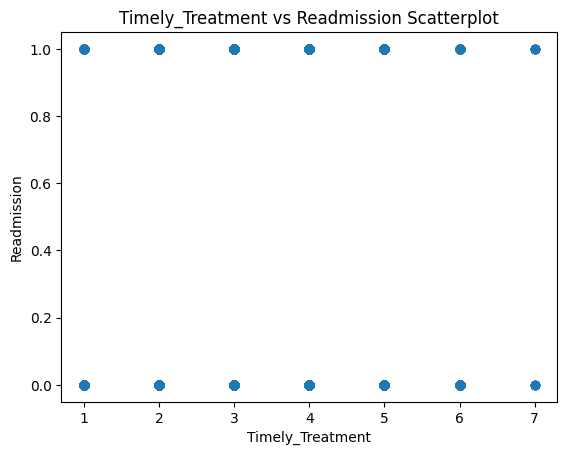

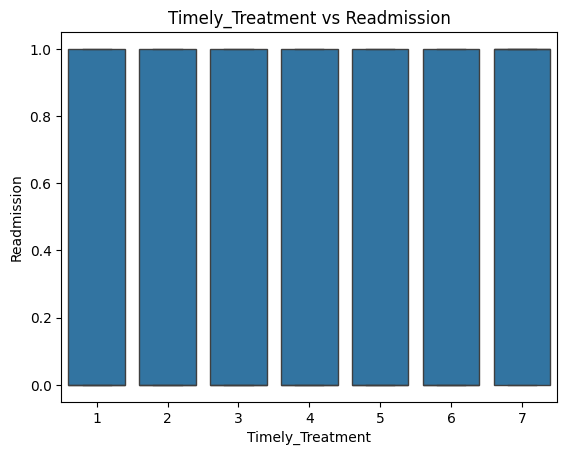

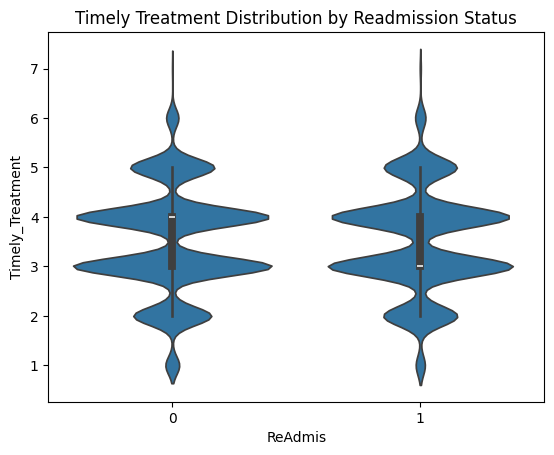

Timely_Treatment vs. Readmission Correlation
-0.0024226714671178443
Timely Visits summary stats
count    10000.000000
mean         3.511100
std          1.032755
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Timely_Visits, dtype: float64


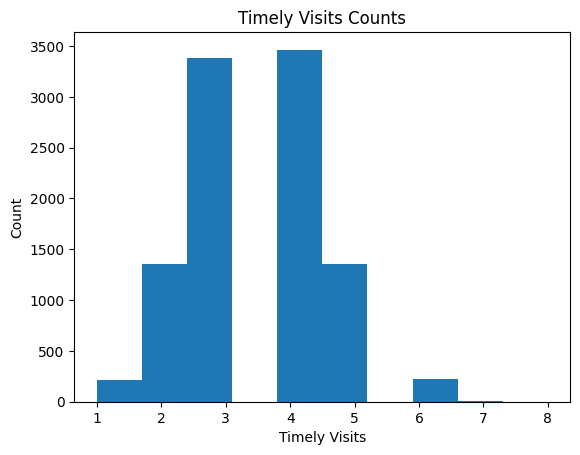

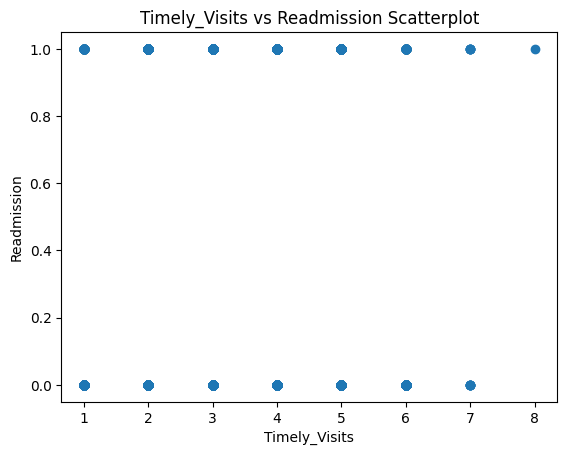

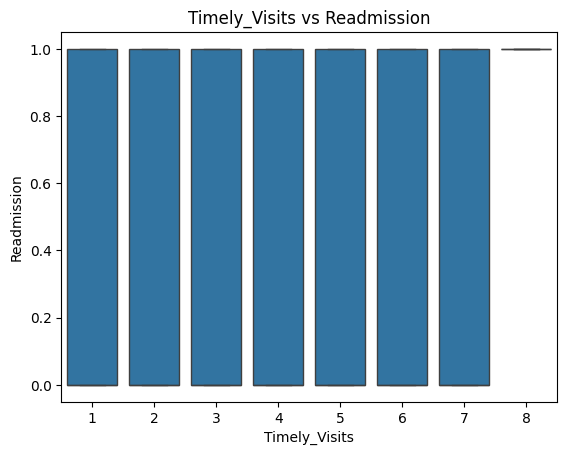

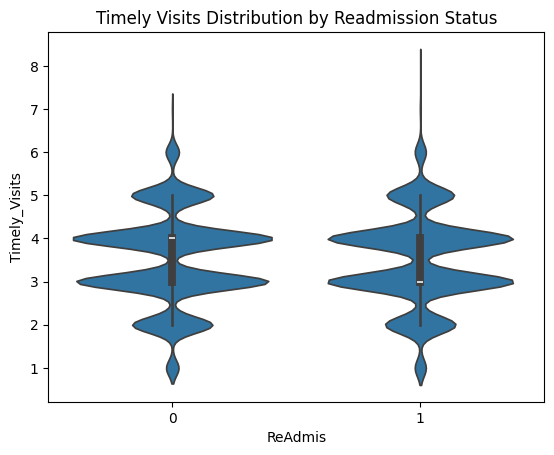

Timely_Visits vs. Readmission Correlation
-0.011698508458558193
Reliability summary stats
count    10000.000000
mean         3.515100
std          1.036282
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Reliability, dtype: float64


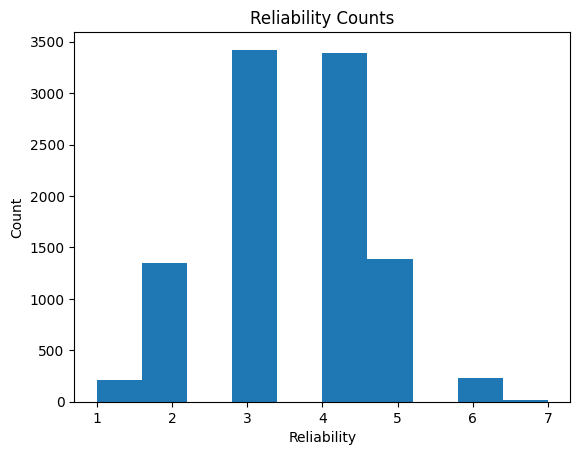

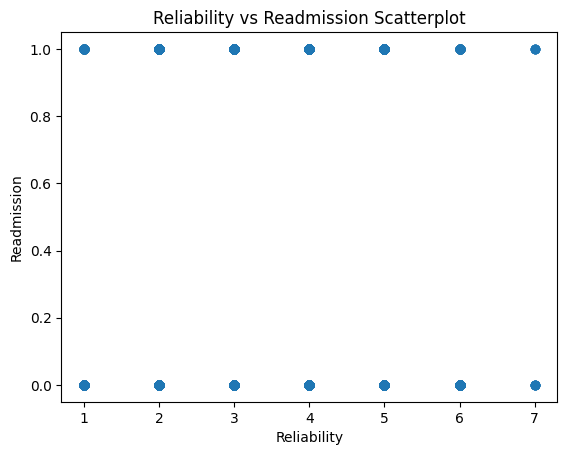

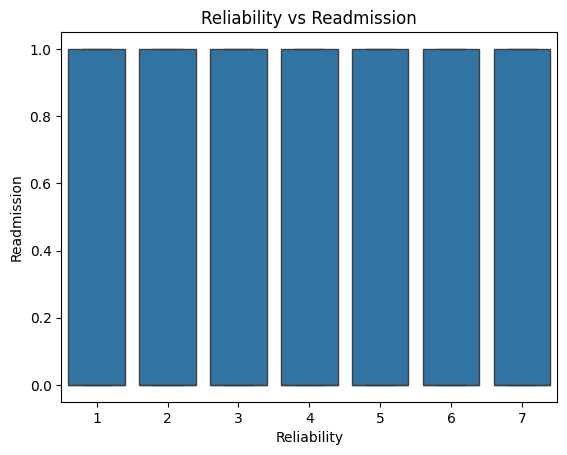

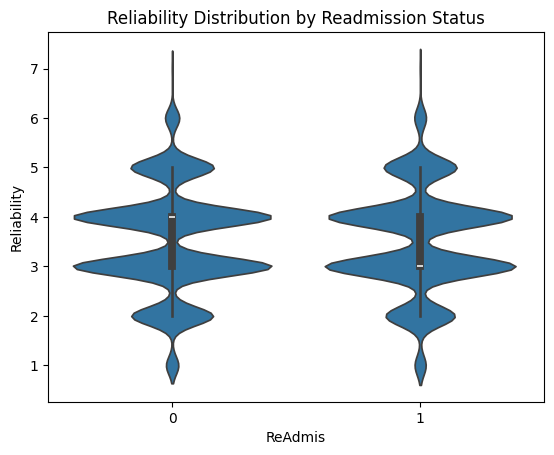

Reliability vs. Readmission Correlation
-0.0019826793709490447
Options summary stats
count    10000.000000
mean         3.496900
std          1.030192
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Options, dtype: float64


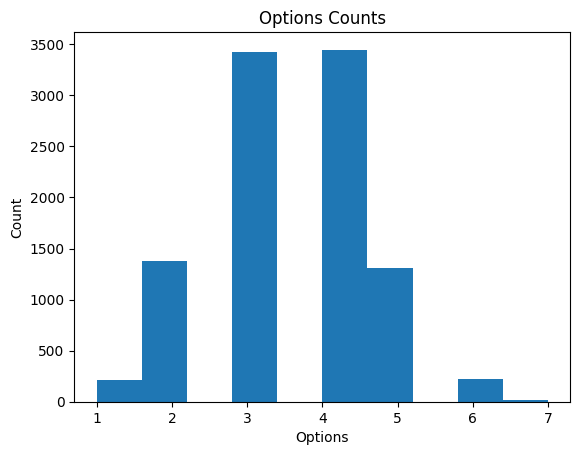

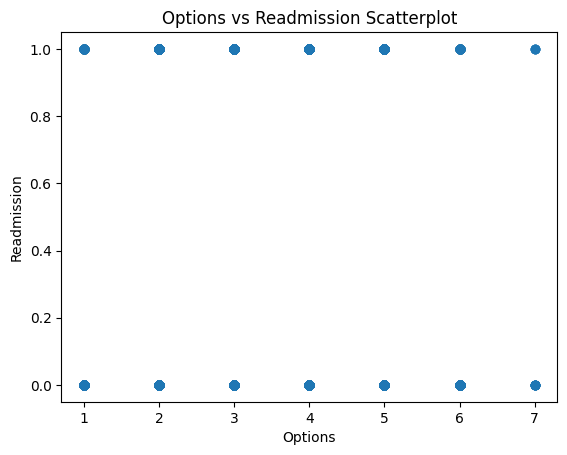

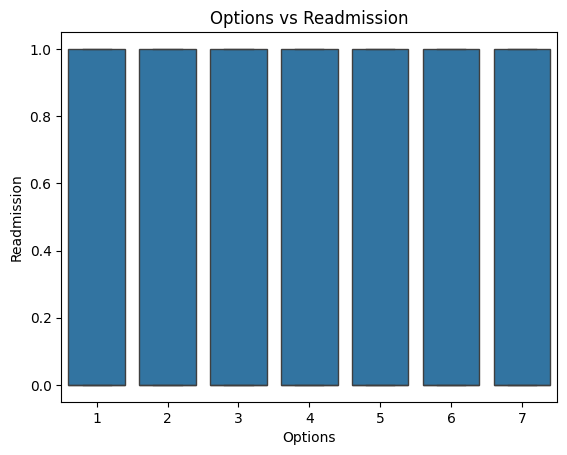

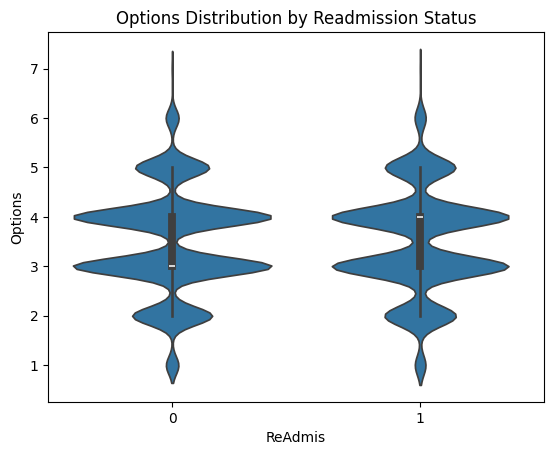

Reliability vs. Readmission Correlation
-0.0019826793709490447
Hours Of Treatment summary stats
count    10000.000000
mean         3.522500
std          1.032376
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Hours_Of_Tx, dtype: float64


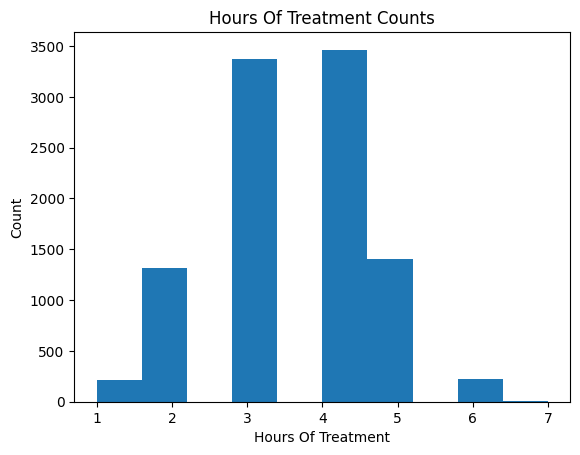

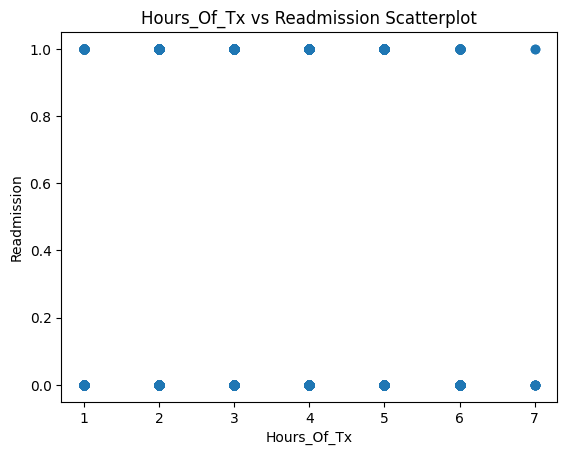

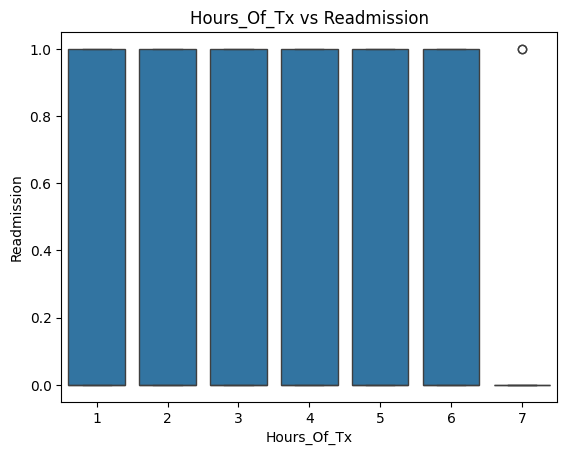

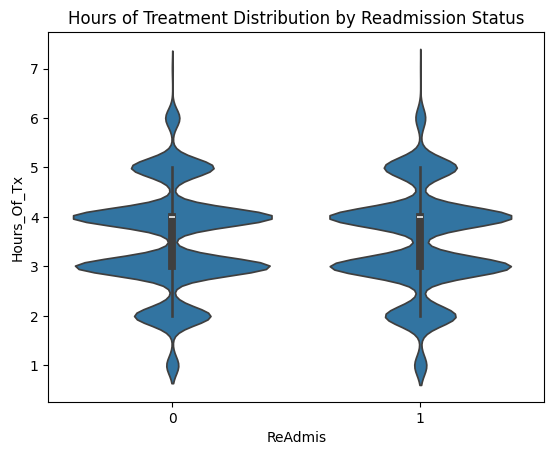

Hours_Of_Tx vs. Readmission Correlation
-0.016893685826393313
Courteous Staff summary stats
count    10000.000000
mean         3.494000
std          1.021405
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Courteous_Staff, dtype: float64


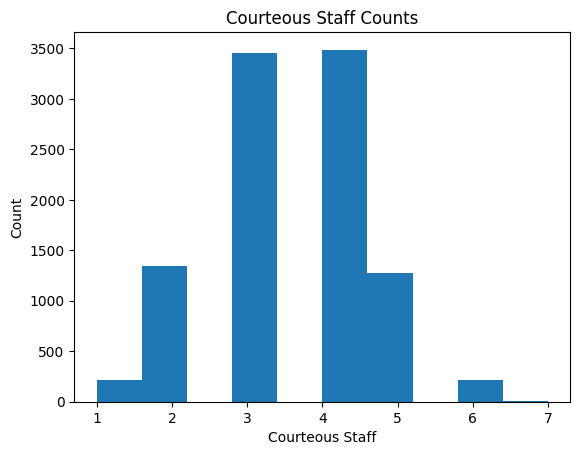

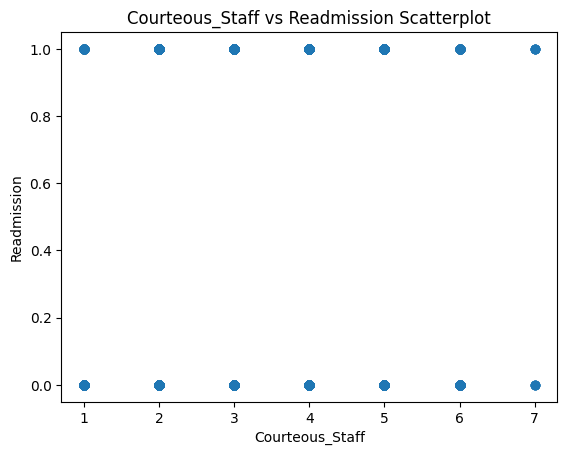

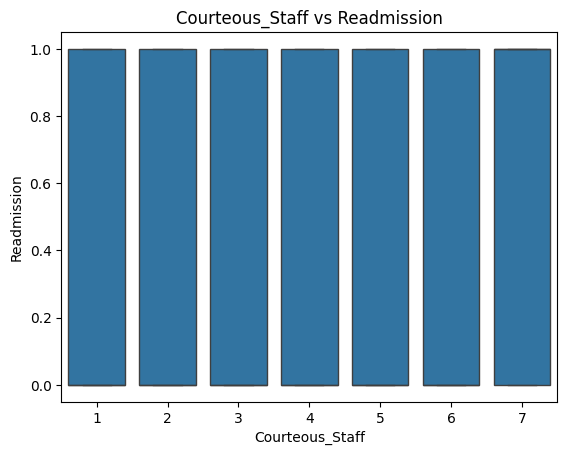

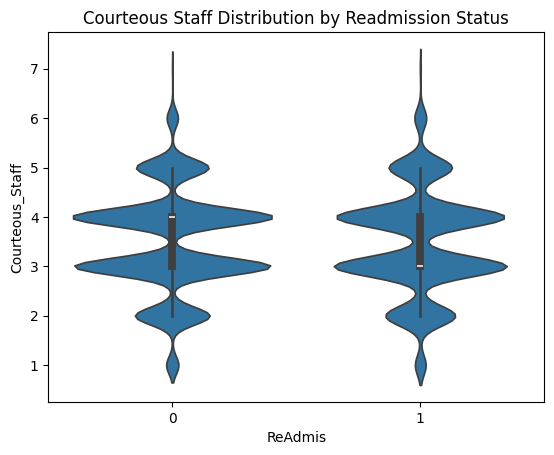

Courteous_Staff vs. Readmission Correlation
-0.004974294994835464
Active Listening summary stats
count    10000.000000
mean         3.509700
std          1.042312
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Active_Listening, dtype: float64


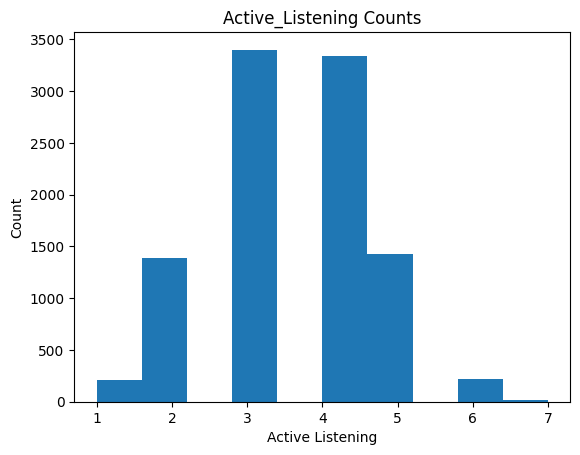

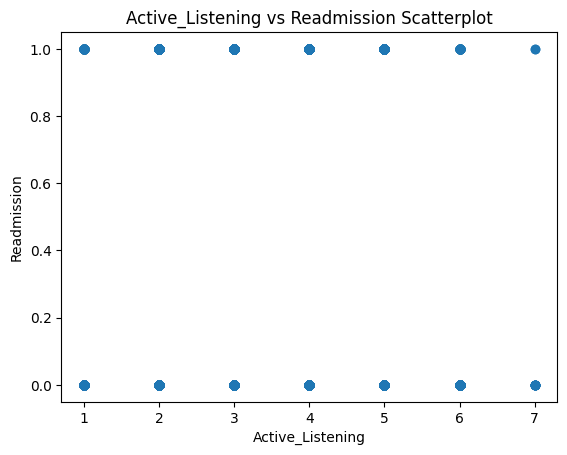

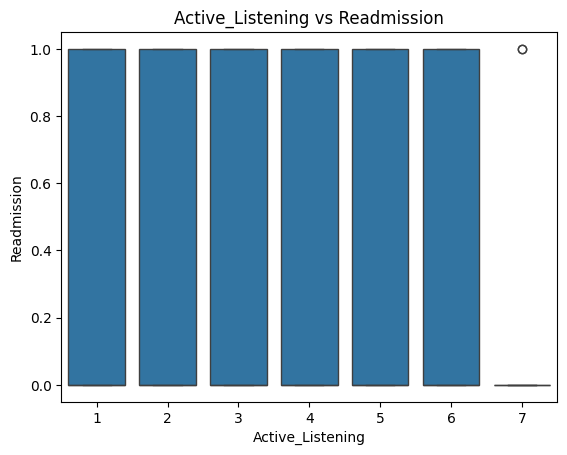

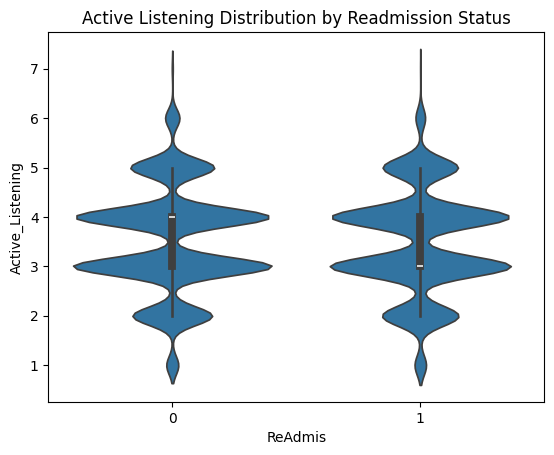

Active_Listening vs. Readmission Correlation
-0.016739969154946778


In [278]:
#Continuous Features Summary Stats

#TotalCharge summary stats & graphs
print("TotalCharge summary stats")
print(df['TotalCharge'].describe())

#TotalCharge Histogram
plt.hist(df['TotalCharge']);
plt.xlabel('TotalCharge');
plt.ylabel('Count');
plt.title('TotalCharge Counts');
plt.show();

#TotalCharge BoxPlot
ax = sns.boxplot(df['TotalCharge']);
ax.set_xlabel('TotalCharge') ;
ax.set_ylabel('Count') ;
ax.set_title('TotalCharge vs Count');
plt.show()

#TotalCharge bivariate scatterplot
plt.scatter(df['TotalCharge'], df['ReAdmis'])
plt.xlabel('TotalCharge')
plt.ylabel('ReAdmission')
plt.title('TotalCharge vs ReAdmission Scatterplot')
plt.show()

#TotalCharge bivariate violin plot
sns.violinplot(x='ReAdmis', y='TotalCharge', data=df)
plt.title('Total Charge Distribution by Readmission Status')
plt.show()

# Calculate TotalCharge correlation with Readmission
print('TotalCharge vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['TotalCharge'])
print(correlation)


#Income summary stats & graphs
print("Income summary stats")
print(df['Income'].describe())

#Income Histogram
plt.hist(df['Income']);
plt.xlabel('Income');
plt.ylabel('Count');
plt.title('Income Counts');
plt.show();

#Income BoxPlot
ax = sns.boxplot(df['Income']);
ax.set_xlabel('Income') ;
ax.set_ylabel('Count') ;
ax.set_title('Income vs Count');
plt.show()

#Income bivariate scatterplot
plt.scatter(df['Income'], df['ReAdmis'])
plt.xlabel('Income')
plt.ylabel('Readmission')
plt.title('Income vs Readmission Scatterplot')
plt.show()

#Income bivariate violin plot
sns.violinplot(x='ReAdmis', y='Income', data=df)
plt.title('Income Distribution by Readmission Status')
plt.show()

# Calculate Income correlation with Readmission
print('Income vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Income'])
print(correlation)

#VitD summary stats & graphs
print("Vitamin D summary stats")
print(df['VitD_levels'].describe())

#VitD_levels Histogram
plt.hist(df['VitD_levels']);
plt.xlabel('Vitamin D');
plt.ylabel('Count');
plt.title('Vitamin D Counts');
plt.show();

#VitD_levels BoxPlot
ax = sns.boxplot(df['VitD_levels']);
ax.set_xlabel('VitD_levels') ;
ax.set_ylabel('Count') ;
ax.set_title('VitD_levels vs Count');
plt.show()

#VitD_levels bivariate scatterplot
plt.scatter(df['VitD_levels'], df['ReAdmis'])
plt.xlabel('VitD_levels')
plt.ylabel('Readmission')
plt.title('VitD_levels vs Readmission Scatterplot')
plt.show()

#VitD_levels bivariate violin plot
sns.violinplot(x='ReAdmis', y='Income', data=df)
plt.title('Vitamin D Distribution by Readmission Status')
plt.show()

# Calculate VitD_levels correlation with Readmission
print('VitD_levels vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['VitD_levels'])
print(correlation)

#Initial_days summary stats & graphs
print("Initial Days summary stats")
print(df['Initial_days'].describe())

#Initial_days Histogram
plt.hist(df['Initial_days']);
plt.xlabel('Initial Days');
plt.ylabel('Count');
plt.title('Initial Days Counts');
plt.show();

#Initial_days BoxPlot
ax = sns.boxplot(df['Initial_days']);
ax.set_xlabel('Initial_days') ;
ax.set_ylabel('Count') ;
ax.set_title('Initial_days vs Count');
plt.show()

#Initial_days bivariate scatterplot
plt.scatter(df['Initial_days'], df['ReAdmis'])
plt.xlabel('Initial_days')
plt.ylabel('Readmission')
plt.title('Initial_days vs Readmission Scatterplot')
plt.show()

#Initial_days bivariate violin plot
sns.violinplot(x='ReAdmis', y='Initial_days', data=df)
plt.title('Initial Days Distribution by Readmission Status')
plt.show()

# Calculate Initial_days correlation with Readmission
print('Initial_days vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Initial_days'])
print(correlation)

#Additional_charges summary stats & graphs
print("Additional Charges summary stats")
print(df['Additional_charges'].describe())

#Additional_charges Histogram
plt.hist(df['Additional_charges']);
plt.xlabel('Additional Charges ');
plt.ylabel('Count');
plt.title('Additional Charges Counts');
plt.show();

#Additional_charges BoxPlot
ax = sns.boxplot(df['Additional_charges']);
ax.set_xlabel('Additional_charges') ;
ax.set_ylabel('Count') ;
ax.set_title('Additional_charges vs Count');
plt.show()

#Additional_charges bivariate scatterplot
plt.scatter(df['Additional_charges'], df['ReAdmis'])
plt.xlabel('Additional_charges')
plt.ylabel('Readmission')
plt.title('Additional_charges vs Readmission Scatterplot')
plt.show()

#Additional_charges bivariate violin plot
sns.violinplot(x='ReAdmis', y='Additional_charges', data=df)
plt.title('Additional Charges Distribution by Readmission Status')
plt.show()

# Calculate Additional_charges correlation with Readmission
print('Additional_charges vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Additional_charges'])
print(correlation)

#Doc_visits summary stats & graphs
print("Doc Visits summary stats")
print(df['Doc_visits'].describe())

#Doc_visits Histogram
plt.hist(df['Doc_visits']);
plt.xlabel('Doc Visits');
plt.ylabel('Count');
plt.title('Doc Visits Counts');
plt.show();

#Doc_visits bivariate scatterplot
plt.scatter(df['Doc_visits'], df['ReAdmis'])
plt.xlabel('Doc_visits')
plt.ylabel('Readmission')
plt.title('Doc_visits vs TotalCharge Scatterplot')
plt.show()

#Doc_visits bivariate BoxPlot
sns.boxplot(x="Doc_visits", y="ReAdmis", data=df)
plt.xlabel('Doc_visits')
plt.ylabel('Readmission')
plt.title('Doc_visits vs Readmission')
plt.show()

#Doc_visits bivariate violin plot
sns.violinplot(x='ReAdmis', y='Doc_visits', data=df)
plt.title('Doctor Visit Distribution by Readmission Status')
plt.show()

# Calculate Doc_visits correlation with Readmission
print('Doc_visits vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Doc_visits'])
print(correlation)

#Timely_Admission summary stats & graphs
print("Timely Admission summary stats")
print(df['Timely_Admission'].describe())

#Timely_Admission Histogram
plt.hist(df['Timely_Admission']);
plt.xlabel('Timely Admission');
plt.ylabel('Count');
plt.title('Timely Admission Counts');
plt.show();

#Timely_Admission bivariate chart
plt.scatter(df['Timely_Admission'], df['ReAdmis'])
plt.xlabel('Timely_Admission')
plt.ylabel('Readmission')
plt.title('Timely_Admission vs TotalCharge Scatterplot')
plt.show()

#Timely_Admission bivariate BoxPlot chart
sns.boxplot(x="Timely_Admission", y="ReAdmis", data=df)
plt.xlabel('Timely_Admission')
plt.ylabel('Readmission')
plt.title('Timely_Admission vs Readmission')
plt.show()

#Timely_Admission bivariate violin plot
sns.violinplot(x='ReAdmis', y='Timely_Admission', data=df)
plt.title('Timely Admission Distribution by Readmission Status')
plt.show()

# Calculate Timely_Admission correlation with Readmission
print('Timely_Admission vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Timely_Admission'])
print(correlation)

#Timely_Treatment summary stats & graphs
print("Timely Treatment summary stats")
print(df['Timely_Treatment'].describe())

#Timely_Treatment Histogram
plt.hist(df['Timely_Treatment']);
plt.xlabel('Timely Treatment');
plt.ylabel('Count');
plt.title('Timely Treatment Counts');
plt.show();

#Timely_Treatment bivariate scatterplot
plt.scatter(df['Timely_Treatment'], df['ReAdmis'])
plt.xlabel('Timely_Treatment')
plt.ylabel('Readmission')
plt.title('Timely_Treatment vs Readmission Scatterplot')
plt.show()

#Timely_Treatment bivariate BoxPlot chart
sns.boxplot(x="Timely_Treatment", y="ReAdmis", data=df)
plt.xlabel('Timely_Treatment')
plt.ylabel('Readmission')
plt.title('Timely_Treatment vs Readmission')
plt.show()

#Timely_Treatment bivariate violin plot
sns.violinplot(x='ReAdmis', y='Timely_Treatment', data=df)
plt.title('Timely Treatment Distribution by Readmission Status')
plt.show()

# Calculate Timely_Treatment correlation with Readmission
print('Timely_Treatment vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Timely_Treatment'])
print(correlation)


#Timely_Visits summary stats & graphs
print("Timely Visits summary stats")
print(df['Timely_Visits'].describe())

#Timely_Visits Histogram
plt.hist(df['Timely_Visits']);
plt.xlabel('Timely Visits');
plt.ylabel('Count');
plt.title('Timely Visits Counts');
plt.show();

#Timely_Visits bivariate scatterplot
plt.scatter(df['Timely_Visits'], df['ReAdmis'])
plt.xlabel('Timely_Visits')
plt.ylabel('Readmission')
plt.title('Timely_Visits vs Readmission Scatterplot')
plt.show()

#Timely_Visits bivariate BoxPlot chart
sns.boxplot(x="Timely_Visits", y="ReAdmis", data=df)
plt.xlabel('Timely_Visits')
plt.ylabel('Readmission')
plt.title('Timely_Visits vs Readmission')
plt.show()

#Timely_Visits bivariate violin plot
sns.violinplot(x='ReAdmis', y='Timely_Visits', data=df)
plt.title('Timely Visits Distribution by Readmission Status')
plt.show()

# Calculate Timely_Visits correlation with Readmission
print('Timely_Visits vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Timely_Visits'])
print(correlation)

#Reliability summary stats & graphs
print("Reliability summary stats")
print(df['Reliability'].describe())

#Reliability Histogram
plt.hist(df['Reliability']);
plt.xlabel('Reliability');
plt.ylabel('Count');
plt.title('Reliability Counts');
plt.show();

#Reliability bivariate scatterplot
plt.scatter(df['Reliability'], df['ReAdmis'])
plt.xlabel('Reliability')
plt.ylabel('Readmission')
plt.title('Reliability vs Readmission Scatterplot')
plt.show()

#Reliability bivariate BoxPlot chart
sns.boxplot(x="Reliability", y="ReAdmis", data=df)
plt.xlabel('Reliability')
plt.ylabel('Readmission')
plt.title('Reliability vs Readmission')
plt.show()

#Reliability bivariate violin plot
sns.violinplot(x='ReAdmis', y='Reliability', data=df)
plt.title('Reliability Distribution by Readmission Status')
plt.show()

# Calculate Reliability correlation with Readmission
print('Reliability vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Reliability'])
print(correlation)

#Options summary stats & graphs
print("Options summary stats")
print(df['Options'].describe())

#Options Histogram
plt.hist(df['Options']);
plt.xlabel('Options');
plt.ylabel('Count');
plt.title('Options Counts');
plt.show();

#Options bivariate chart
plt.scatter(df['Options'], df['ReAdmis'])
plt.xlabel('Options')
plt.ylabel('Readmission')
plt.title('Options vs Readmission Scatterplot')
plt.show()

#Options bivariate BoxPlot chart
sns.boxplot(x="Options", y="ReAdmis", data=df)
plt.xlabel('Options')
plt.ylabel('Readmission')
plt.title('Options vs Readmission')
plt.show()

#Reliability bivariate violin plot
sns.violinplot(x='ReAdmis', y='Options', data=df)
plt.title('Options Distribution by Readmission Status')
plt.show()


# Calculate Reliability correlation with Readmission
print('Reliability vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Reliability'])
print(correlation)

#Hours_Of_Tx summary stats & graphs
print("Hours Of Treatment summary stats")
print(df['Hours_Of_Tx'].describe())

#Hours_Of_Tx Histogram
plt.hist(df['Hours_Of_Tx']);
plt.xlabel('Hours Of Treatment');
plt.ylabel('Count');
plt.title('Hours Of Treatment Counts');
plt.show();

#Hours_Of_Tx bivariate scatterplot
plt.scatter(df['Hours_Of_Tx'], df['ReAdmis'])
plt.xlabel('Hours_Of_Tx')
plt.ylabel('Readmission')
plt.title('Hours_Of_Tx vs Readmission Scatterplot')
plt.show()

#Hours_Of_Tx bivariate BoxPlot chart
sns.boxplot(x="Hours_Of_Tx", y="ReAdmis", data=df)
plt.xlabel('Hours_Of_Tx')
plt.ylabel('Readmission')
plt.title('Hours_Of_Tx vs Readmission')
plt.show()

#Hours_Of_Tx bivariate violin plot
sns.violinplot(x='ReAdmis', y='Hours_Of_Tx', data=df)
plt.title('Hours of Treatment Distribution by Readmission Status')
plt.show()

# Calculate Hours_Of_Tx correlation with Readmission
print('Hours_Of_Tx vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Hours_Of_Tx'])
print(correlation)

#Courteous_Staff summary stats & graphs
print("Courteous Staff summary stats")
print(df['Courteous_Staff'].describe())

#Courteous_Staff Histogram
plt.hist(df['Courteous_Staff']);
plt.xlabel('Courteous Staff');
plt.ylabel('Count');
plt.title('Courteous Staff Counts');
plt.show();

#Courteous_Staff bivariate chart
plt.scatter(df['Courteous_Staff'], df['ReAdmis'])
plt.xlabel('Courteous_Staff')
plt.ylabel('Readmission')
plt.title('Courteous_Staff vs Readmission Scatterplot')
plt.show()

#Courteous_Staff bivariate BoxPlot chart
sns.boxplot(x="Courteous_Staff", y="ReAdmis", data=df)
plt.xlabel('Courteous_Staff')
plt.ylabel('Readmission')
plt.title('Courteous_Staff vs Readmission')
plt.show()


#Courteous_Staff bivariate violin plot
sns.violinplot(x='ReAdmis', y='Courteous_Staff', data=df)
plt.title('Courteous Staff Distribution by Readmission Status')
plt.show()

# Calculate Courteous_Staff correlation with Readmission
print('Courteous_Staff vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Courteous_Staff'])
print(correlation)

#Active_Listening summary stats & graphs
print("Active Listening summary stats")
print(df['Active_Listening'].describe())

#Active_Listening Histogram
plt.hist(df['Active_Listening']);
plt.xlabel('Active Listening');
plt.ylabel('Count');
plt.title('Active_Listening Counts');
plt.show();

#Active_Listening bivariate chart
plt.scatter(df['Active_Listening'], df['ReAdmis'])
plt.xlabel('Active_Listening')
plt.ylabel('Readmission')
plt.title('Active_Listening vs Readmission Scatterplot')
plt.show()

#Active_Listening bivariate BoxPlot chart
sns.boxplot(x="Active_Listening", y="ReAdmis", data=df)
plt.xlabel('Active_Listening')
plt.ylabel('Readmission')
plt.title('Active_Listening vs Readmission')
plt.show()

#Active_Listening bivariate violin plot
sns.violinplot(x='ReAdmis', y='Active_Listening', data=df)
plt.title('Active Listening Distribution by Readmission Status')
plt.show()

# Calculate Active_Listening correlation with Readmission
print('Active_Listening vs. Readmission Correlation')
correlation = df['ReAdmis'].corr(df['Active_Listening'])
print(correlation)

In [279]:
#identify research dependent variable
dependent_variable = 'ReAdmis'

In [280]:
#create list of independent variables and remove response variable
independent_variables = list(df.columns)
independent_variables.remove(dependent_variable)
independent_variables
boolean_columns = df.columns[df.dtypes == 'bool']
df[boolean_columns] = df[boolean_columns].astype(int)
df

,Age,Income,ReAdmis,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
0,53,86575.93,0,19.141466,6,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,1,0,1,0,1,0,0,0,0,0,1
1,51,46805.99,0,18.940352,4,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,0,1,0,0,1,0,0,1,0,0,0
2,53,14370.14,0,18.057507,4,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,1,0,0,0,0,0,0,0,0,0,1
3,78,39741.49,0,16.576858,4,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1,0,1,0,0,0,0,0,0,0,1
4,22,1209.56,0,17.439069,5,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,0,16.980860,4,1,0,0,0,0,0,0,1,0,1,0,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
9996,87,14983.02,1,18.177020,5,1,0,1,1,1,0,0,0,0,0,1,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,0,1,1,0,0,0,1,0,0,0,1
9997,45,65917.81,1,17.129070,4,1,0,1,0,0,0,0,1,1,0,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,0,0,0,0,0,0,0,1,0,0,0
9998,43,29702.32,1,19.910430,5,0,0,1,0,0,0,1,0,0,0,0,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,0,0,1,0,1,0,0,0,0,0,1


In [281]:
independent_variables

['Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'HighBlood',
 'Stroke',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Timely_Admission',
 'Timely_Treatment',
 'Timely_Visits',
 'Reliability',
 'Options',
 'Hours_Of_Tx',
 'Courteous_Staff',
 'Active_Listening',
 'Area_Suburban',
 'Area_Urban',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency Admission',
 'Initial_admin_Observation Admission',
 'Services_CT Scan',
 'Services_Intravenous',
 'Services_MRI',
 'Complication_risk_Low',
 'Complication_risk_Medium']

In [282]:
df

,Age,Income,ReAdmis,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
0,53,86575.93,0,19.141466,6,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,1,0,1,0,1,0,0,0,0,0,1
1,51,46805.99,0,18.940352,4,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,0,1,0,0,1,0,0,1,0,0,0
2,53,14370.14,0,18.057507,4,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,1,0,0,0,0,0,0,0,0,0,1
3,78,39741.49,0,16.576858,4,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1,0,1,0,0,0,0,0,0,0,1
4,22,1209.56,0,17.439069,5,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,0,16.980860,4,1,0,0,0,0,0,0,1,0,1,0,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
9996,87,14983.02,1,18.177020,5,1,0,1,1,1,0,0,0,0,0,1,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,0,1,1,0,0,0,1,0,0,0,1
9997,45,65917.81,1,17.129070,4,1,0,1,0,0,0,0,1,1,0,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,0,0,0,0,0,0,0,1,0,0,0
9998,43,29702.32,1,19.910430,5,0,0,1,0,0,0,1,0,0,0,0,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,0,0,1,0,1,0,0,0,0,0,1


In [283]:
#identify and remove Income outliers more than 3 std from mean
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outlier_removal = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(outlier_removal['Income'])
print(outlier_removal.shape)
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

30      167105.10
36      122615.82
58      132963.95
63      128855.39
77      135288.23
          ...    
9791    106692.90
9862    121276.60
9906    138512.90
9910    119679.10
9955    122291.50
Name: Income, Length: 326, dtype: float64
(326, 38)


In [284]:
#identify and remove Additional_charges outliers more than 3 std from mean
q1 = df['Additional_charges'].quantile(0.25)
q3 = df['Additional_charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outlier_removal = df[(df['Additional_charges'] < lower_bound) | (df['Additional_charges'] > upper_bound)]
print(outlier_removal['Additional_charges'])
print(outlier_removal.shape)
df = df[(df['Additional_charges'] >= lower_bound) & (df['Additional_charges'] <= upper_bound)]

20      28788.08031
81      28102.95750
101     28297.97033
102     29021.25261
114     28830.32716
           ...     
9802    28632.32000
9850    27209.89000
9866    27861.36000
9993    27882.08000
9996    28507.15000
Name: Additional_charges, Length: 413, dtype: float64
(413, 38)


In [285]:
#identify and remove VitD_levels outliers more than 3 std from mean
q1 = df['VitD_levels'].quantile(0.25)
q3 = df['VitD_levels'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outlier_removal = df[(df['VitD_levels'] < lower_bound) | (df['VitD_levels'] > upper_bound)]
print(outlier_removal['VitD_levels'])
print(outlier_removal.shape)
df = df[(df['VitD_levels'] >= lower_bound) & (df['VitD_levels'] <= upper_bound)]

22      24.565463
64      23.662948
337     12.325488
467     23.906407
507     24.559132
509     11.785395
635     11.475314
790     12.433745
812     12.313590
818     12.546070
1315    10.877427
1348    23.501133
1439    12.091658
1537    23.442725
1541    12.509970
1628    12.072534
1663    23.941426
2382    24.371580
2615    23.453194
2704    23.852194
3288    10.315234
3491    23.593703
3502    12.207388
3563    23.938421
4185    25.444099
4224    23.507827
4259    12.074147
4369    26.394449
4381    12.062467
4529    24.421656
5065    11.538730
5258    11.083430
5339    23.524230
6064    23.527640
6672    23.531320
6792    11.966340
6829    25.147270
6947    24.356250
7157    23.833530
7187    11.846830
7287    12.507730
7792    12.559130
7909    24.637420
8021    23.624500
8140     9.806483
8197    12.118830
8251    24.889110
8348    24.450370
8408    24.166720
8491    11.755560
8575    23.739160
8843    24.098840
8850    24.538710
9047    12.317130
9223    23.615650
9270    11

In [286]:
#create DataFrame of model variables
X = df[independent_variables]
y = df[dependent_variable];
X

,Age,Income,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
0,53,86575.93,19.141466,6,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,1,0,1,0,1,0,0,0,0,0,1
1,51,46805.99,18.940352,4,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,0,1,0,0,1,0,0,1,0,0,0
2,53,14370.14,18.057507,4,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,1,0,0,0,0,0,0,0,0,0,1
3,78,39741.49,16.576858,4,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1,0,1,0,0,0,0,0,0,0,1
4,22,1209.56,17.439069,5,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,69,39797.05,16.604600,4,0,0,0,1,0,0,0,0,0,1,1,37.932120,5607.716000,12045.860000,2,3,2,1,5,3,4,2,0,1,1,0,1,0,0,0,0,0,1
9995,25,45967.61,16.980860,4,1,0,0,0,0,0,0,1,0,1,0,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
9997,45,65917.81,17.129070,4,1,0,1,0,0,0,0,1,1,0,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,0,0,0,0,0,0,0,1,0,0,0
9998,43,29702.32,19.910430,5,0,0,1,0,0,0,1,0,0,0,0,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,0,0,1,0,1,0,0,0,0,0,1


<Axes: >

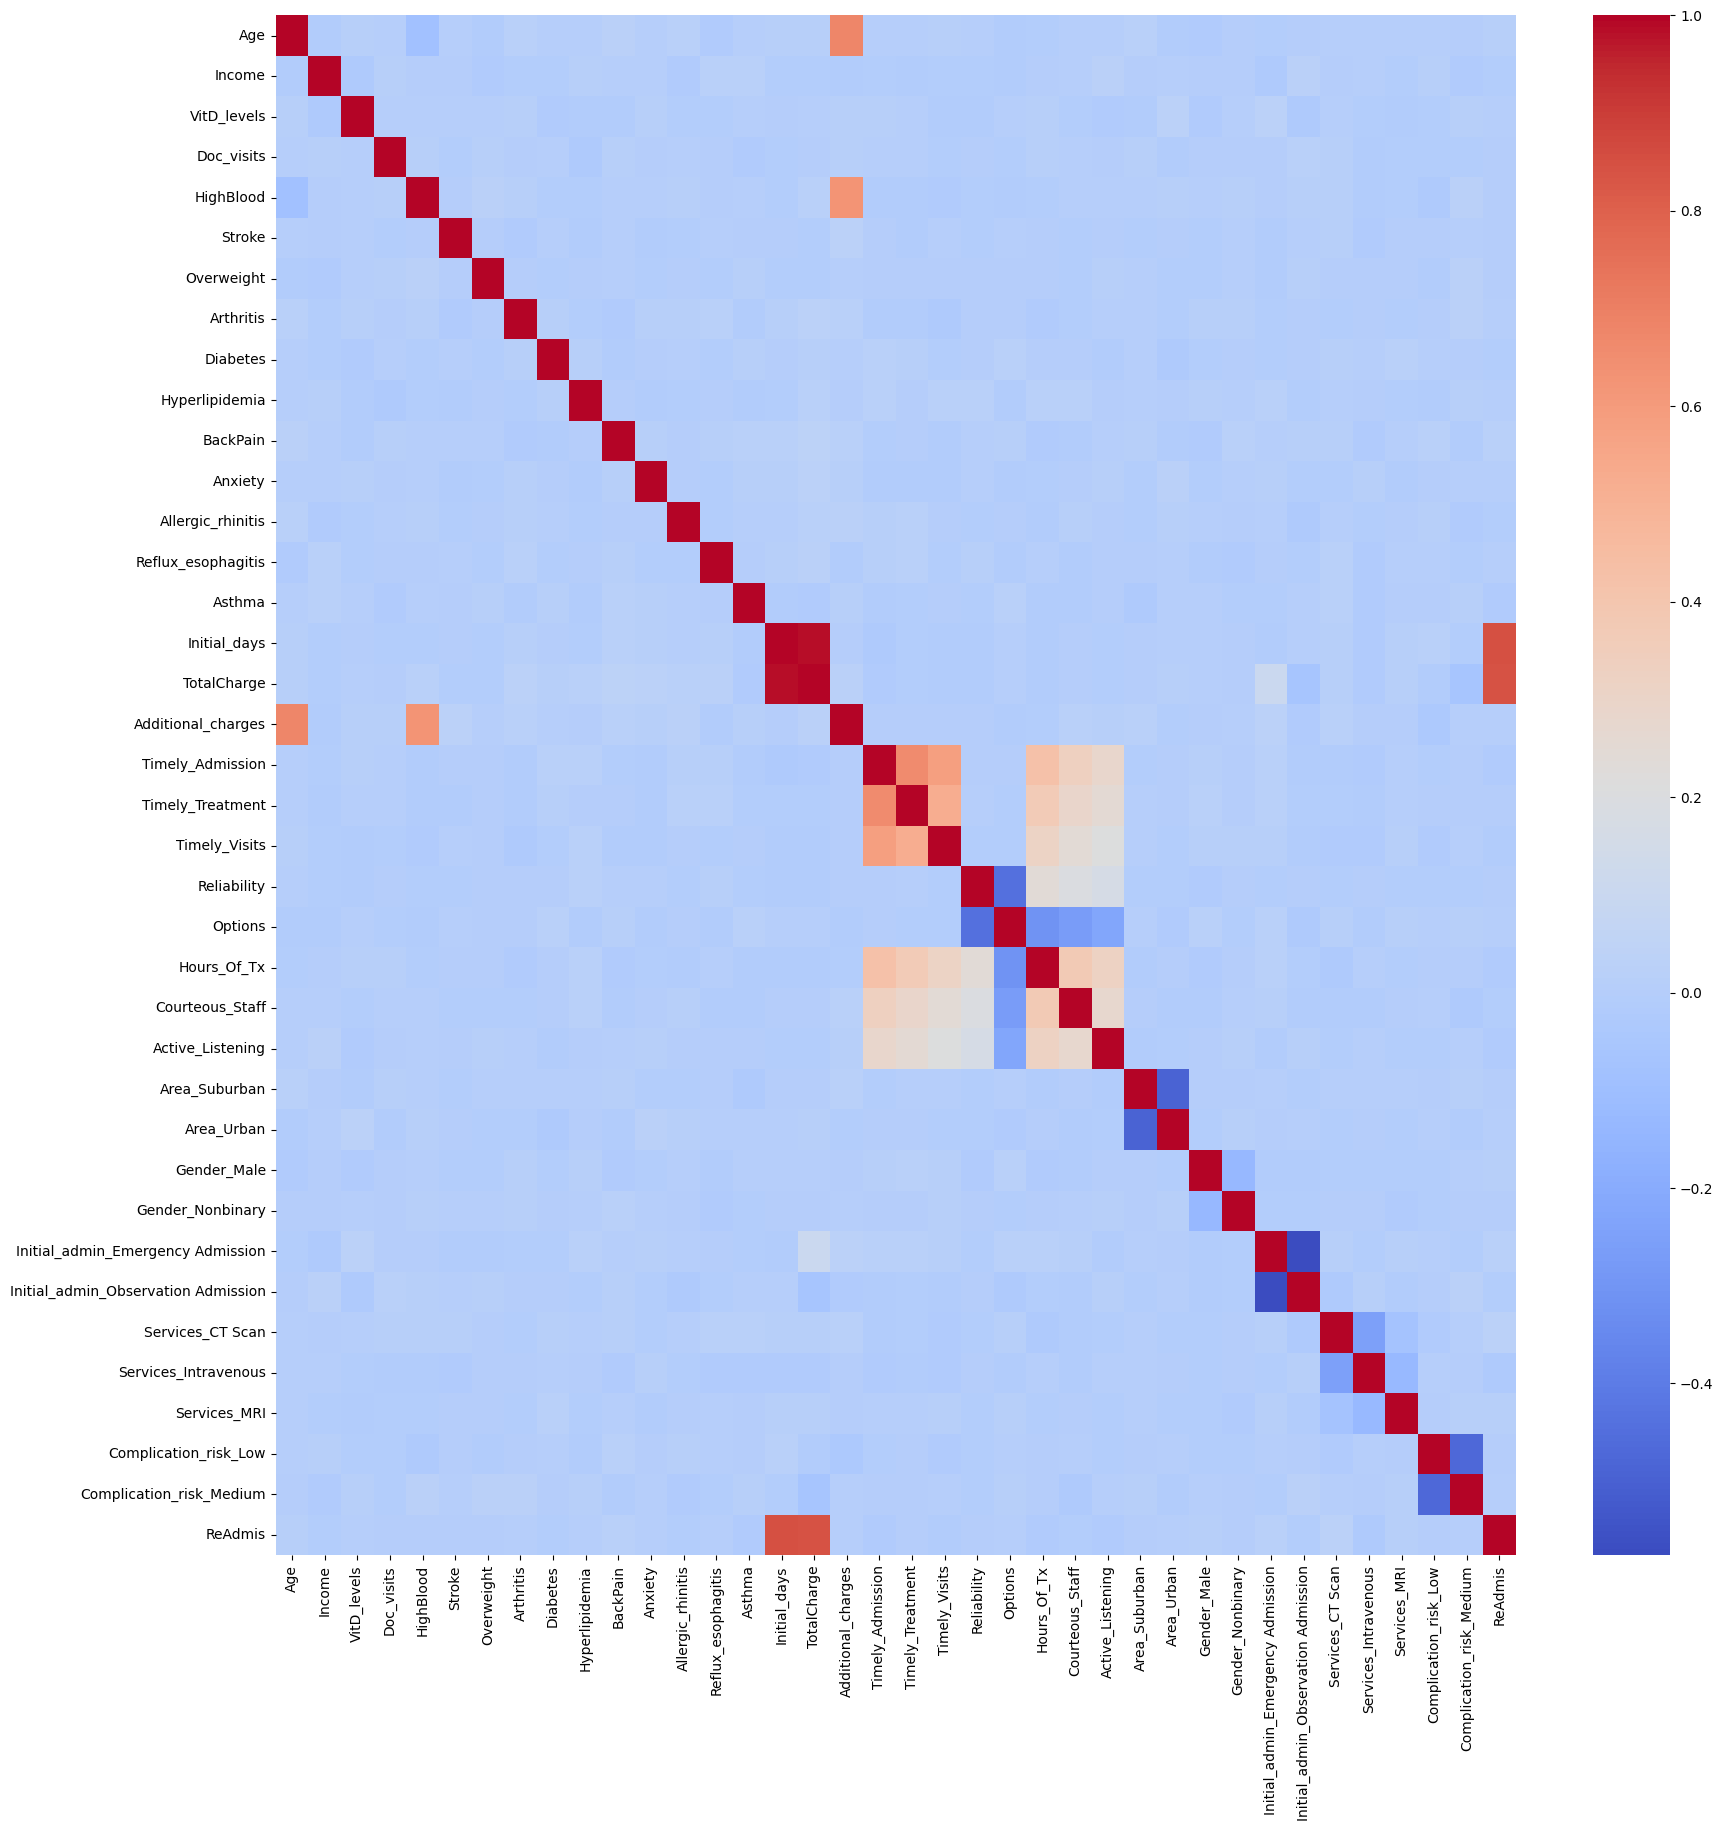

In [287]:
plt.figure(figsize=(20,20))
sns.heatmap(data=pd.concat([X,y],axis=1).corr(),cmap="coolwarm")

In [288]:
#Remove any columns with specified collinearity
CorrelationMatrix = X.corr().abs()
upper = CorrelationMatrix.where(np.triu(np.ones(CorrelationMatrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)
X = X.drop(columns=to_drop)

['TotalCharge']


<Axes: >

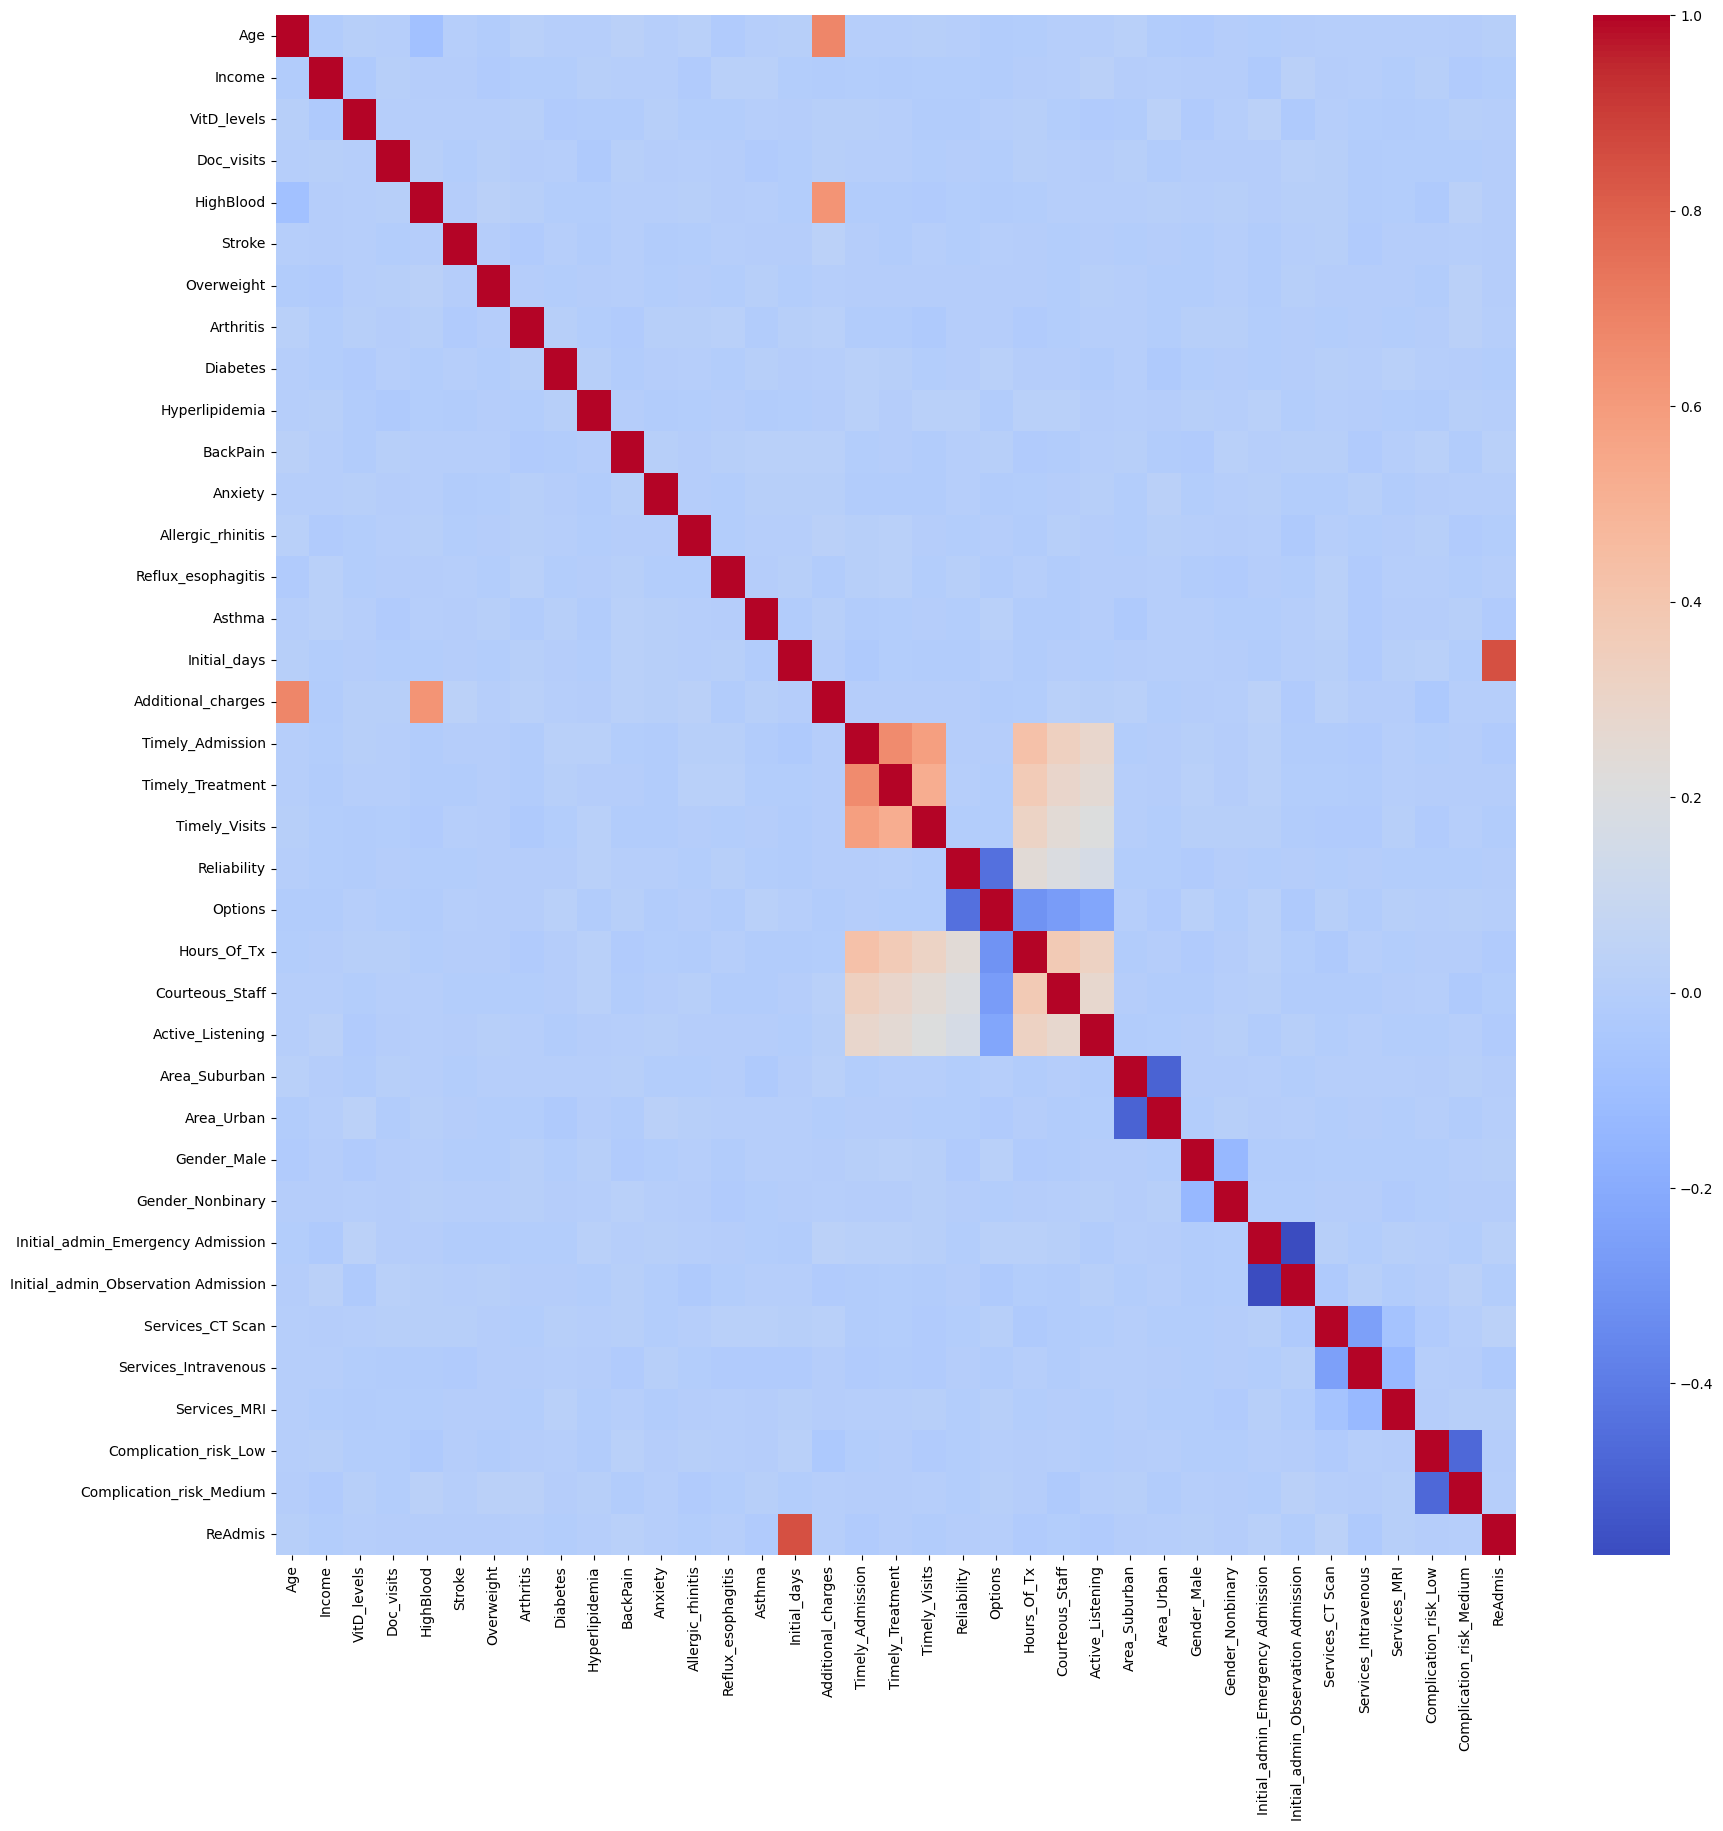

In [289]:
plt.figure(figsize=(20,20))
sns.heatmap(data=pd.concat([X,y],axis=1).corr(),cmap="coolwarm")

In [290]:
print(CorrelationMatrix.shape)

(37, 37)


In [291]:
X.to_csv('CleanedIndependentVariableLogisticData.csv', index=False)
y.to_csv('DependentVariableData.csv', index=False)
X

,Age,Income,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
0,53,86575.93,19.141466,6,1,0,0,1,1,0,1,1,1,0,1,10.585770,17939.403420,3,3,2,2,4,3,3,4,1,0,1,0,1,0,0,0,0,0,1
1,51,46805.99,18.940352,4,1,0,1,0,0,0,0,0,0,1,0,15.129562,17612.998120,3,4,3,4,4,4,3,3,0,1,0,0,1,0,0,1,0,0,0
2,53,14370.14,18.057507,4,1,0,1,0,1,0,0,0,0,0,0,4.772177,17505.192460,2,4,4,4,3,4,3,3,1,0,0,0,0,0,0,0,0,0,1
3,78,39741.49,16.576858,4,0,1,0,1,0,0,0,0,0,1,1,1.714879,12993.437350,3,5,5,3,4,5,5,5,1,0,1,0,0,0,0,0,0,0,1
4,22,1209.56,17.439069,5,0,0,0,0,0,1,0,0,1,0,0,1.254807,3716.525786,2,1,3,3,5,3,4,3,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,69,39797.05,16.604600,4,0,0,0,1,0,0,0,0,0,1,1,37.932120,12045.860000,2,3,2,1,5,3,4,2,0,1,1,0,1,0,0,0,0,0,1
9995,25,45967.61,16.980860,4,1,0,0,0,0,0,0,1,0,1,0,51.561220,8927.642000,3,2,2,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
9997,45,65917.81,17.129070,4,1,0,1,0,0,0,0,1,1,0,0,70.154180,15281.210000,3,3,3,4,4,2,3,2,0,0,0,0,0,0,0,1,0,0,0
9998,43,29702.32,19.910430,5,0,0,1,0,0,0,1,0,0,0,0,63.356900,7781.678000,5,5,3,4,4,3,4,3,0,0,1,0,1,0,0,0,0,0,1


In [292]:
#Split data into test and train for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test
X_train

,Age,Income,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Additional_charges,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,Hours_Of_Tx,Courteous_Staff,Active_Listening,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium
9655,53,28014.72,16.816660,5,0,0,1,0,0,1,0,0,1,1,1,54.833670,9626.19100,3,2,4,2,5,3,4,2,1,0,0,0,1,0,0,1,0,0,0
5292,79,4917.96,18.472920,4,1,0,1,0,0,0,1,0,1,0,0,63.859460,26614.38000,2,4,3,4,3,3,4,4,0,1,0,0,1,0,0,0,1,0,0
5657,83,31798.49,15.260090,7,0,0,0,0,0,0,1,0,1,0,0,36.270750,13928.75000,3,3,5,3,2,2,4,4,0,0,0,0,1,0,0,0,0,1,0
7507,29,10973.81,17.441870,4,1,0,1,0,0,0,1,1,1,1,0,63.484340,10270.26000,3,3,4,3,4,3,4,2,0,1,1,0,1,0,0,1,0,0,1
4266,63,29650.61,19.224557,5,0,0,1,1,0,0,0,1,0,1,0,6.862228,10385.91553,2,3,3,5,1,3,3,4,0,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,49,25380.83,22.590570,5,0,0,0,0,1,1,0,1,0,1,0,59.424480,8639.04500,3,2,3,5,2,3,4,5,0,1,0,0,0,0,0,1,0,0,0
5655,40,64510.88,16.710840,7,0,0,1,0,1,1,1,0,1,1,0,64.880350,6685.49400,4,4,3,3,3,3,4,4,1,0,0,0,0,0,0,0,0,1,0
5873,25,26866.40,15.382300,4,1,0,1,0,0,0,0,0,0,0,0,53.912110,9112.19800,3,3,3,2,4,2,2,3,1,0,1,0,0,1,0,1,0,0,0
943,78,4999.33,19.776375,4,1,0,1,0,0,0,0,0,0,1,1,7.588040,25751.73183,4,5,5,4,4,4,4,4,0,1,0,0,1,0,0,0,0,1,0


In [293]:
x_train_sm = sm.add_constant(X_train)
model_sm = sm.Logit(y_train.to_numpy(), x_train_sm).fit()
print(model_sm.summary())


Optimization terminated successfully.
         Current function value: 0.031702
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7361
Model:                          Logit   Df Residuals:                     7324
Method:                           MLE   Df Model:                           36
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.9518
Time:                        18:55:05   Log-Likelihood:                -233.36
converged:                       True   LL-Null:                       -4844.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -83.6494      5.779

In [294]:
#Create predictions based on model
y_train_pred = initial_model.predict(X_train)
y_test_pred = initial_model.predict(X_test)

Training Accuracy Score: 0.9443010460535254
Testing Accuracy Score: 0.9407930472569256
Training F1 Score: 0.92588575560376
Testing F1 Score: 0.9200293470286134
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1168
           1       0.91      0.93      0.92       673

    accuracy                           0.94      1841
   macro avg       0.93      0.94      0.94      1841
weighted avg       0.94      0.94      0.94      1841



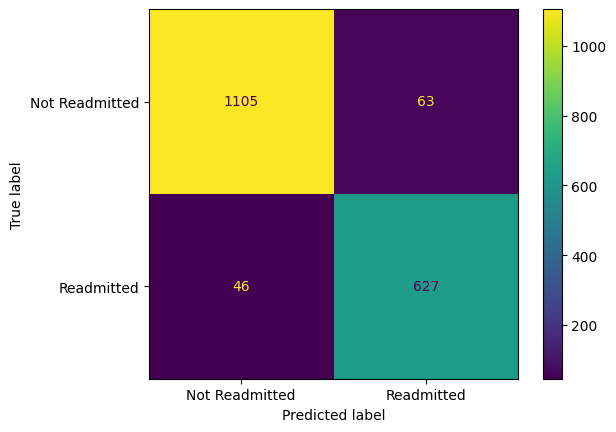

In [295]:
#Print out Accuracy and F1 Score
print('Training Accuracy Score:', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy Score:', accuracy_score(y_test, y_test_pred))
print('Training F1 Score:', f1_score(y_train, y_train_pred))
print('Testing F1 Score:', f1_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=("Not Readmitted","Readmitted"))
disp.plot()
cr = classification_report(y_test, y_test_pred)
print(cr)

In [296]:
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
calculate_VIF(X_train)

,Features,VIF
0,Age,70.277492
1,Income,3.549260
2,VitD_levels,51.722573
3,Doc_visits,21.866615
4,HighBlood,13.235527
5,Stroke,1.259835
6,Overweight,3.423528
7,Arthritis,1.556484
8,Diabetes,1.381063
9,Hyperlipidemia,1.514359


In [297]:
pvalue_threshold = 0.05
vif_threshold = 5
X_train_update = X_train.copy()

while True:
    vif_table = calculate_VIF(X_train_update)

    pvalues = model_sm.pvalues
    pvalue_max = pvalues.max()
    vif_max = vif_table.VIF.max()
    if pvalue_max > pvalue_threshold:
      drop_var = pvalues.idxmax()
      X_train_update = X_train_update.drop(drop_var, axis=1)
      print(f"Dropped variable based on Pvalue: {drop_var}")
    elif vif_max > vif_threshold:
      drop_var = vif_table[vif_table.VIF == vif_max].Features.values[0]
      X_train_update = X_train_update.drop(drop_var, axis=1)
      print(f"Dropped variable based on VIF: {drop_var}")
    else:
      break
    model_sm = sm.Logit(y_train.to_numpy(), sm.add_constant(X_train_update)).fit()
#print(model_sm.summary())

Dropped variable based on Pvalue: BackPain
Optimization terminated successfully.
         Current function value: 0.031702
         Iterations 14
Dropped variable based on Pvalue: Area_Urban
Optimization terminated successfully.
         Current function value: 0.031702
         Iterations 14
Dropped variable based on Pvalue: Active_Listening
Optimization terminated successfully.
         Current function value: 0.031705
         Iterations 14
Dropped variable based on Pvalue: VitD_levels
Optimization terminated successfully.
         Current function value: 0.031708
         Iterations 14
Dropped variable based on Pvalue: Doc_visits
Optimization terminated successfully.
         Current function value: 0.031718
         Iterations 14
Dropped variable based on Pvalue: Reliability
Optimization terminated successfully.
         Current function value: 0.031735
         Iterations 14
Dropped variable based on Pvalue: Income
Optimization terminated successfully.
         Current function v

In [298]:
vif_table = calculate_VIF(X_train_update)
print(vif_table)

                               Features       VIF
0                             HighBlood  1.522876
1                                Stroke  1.212292
2                             Arthritis  1.467339
3                               Anxiety  1.414800
4                     Allergic_rhinitis  1.543746
5                                Asthma  1.342669
6                          Initial_days  2.224710
7     Initial_admin_Emergency Admission  2.116163
8   Initial_admin_Observation Admission  1.535738
9                      Services_CT Scan  1.131536
10                         Services_MRI  1.041193
11                Complication_risk_Low  1.235148


In [299]:
def calculate_COR(X_train_update):
    cor = pd.DataFrame()
    cor['Features'] = X_train_update.columns
    cor['COR'] = [df['ReAdmis'].corr(X_train_update[feature]) for feature in X.columns]

    return cor
calculate_COR(X_train)

correlation_table = calculate_COR(X_train)
print(correlation_table)

                               Features       COR
0                                   Age  0.017790
1                                Income -0.004780
2                           VitD_levels  0.003199
3                            Doc_visits -0.008466
4                             HighBlood -0.001575
5                                Stroke  0.001003
6                            Overweight  0.006880
7                             Arthritis  0.006619
8                              Diabetes -0.001678
9                        Hyperlipidemia -0.015035
10                             BackPain  0.020404
11                              Anxiety  0.006422
12                    Allergic_rhinitis -0.001483
13                   Reflux_esophagitis -0.005452
14                               Asthma -0.012960
15                         Initial_days  0.850899
16                   Additional_charges  0.010094
17                     Timely_Admission -0.015464
18                     Timely_Treatment  0.001642


In [300]:
#print independent variable values to be used in reduced model
print(X_train_update.columns)

Index(['HighBlood', 'Stroke', 'Arthritis', 'Anxiety', 'Allergic_rhinitis',
       'Asthma', 'Initial_days', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Services_CT Scan',
       'Services_MRI', 'Complication_risk_Low'],
      dtype='object')


In [301]:
#alter selected features to contain only pvalues < 0.05
#selected_features = model_sm.pvalues[model_sm.pvalues < 0.05].index.tolist()
#selected_features.remove('const')
#selected_features
selected_features = X_train_update.columns.tolist()
selected_features

['HighBlood',
 'Stroke',
 'Arthritis',
 'Anxiety',
 'Allergic_rhinitis',
 'Asthma',
 'Initial_days',
 'Initial_admin_Emergency Admission',
 'Initial_admin_Observation Admission',
 'Services_CT Scan',
 'Services_MRI',
 'Complication_risk_Low']

<Axes: >

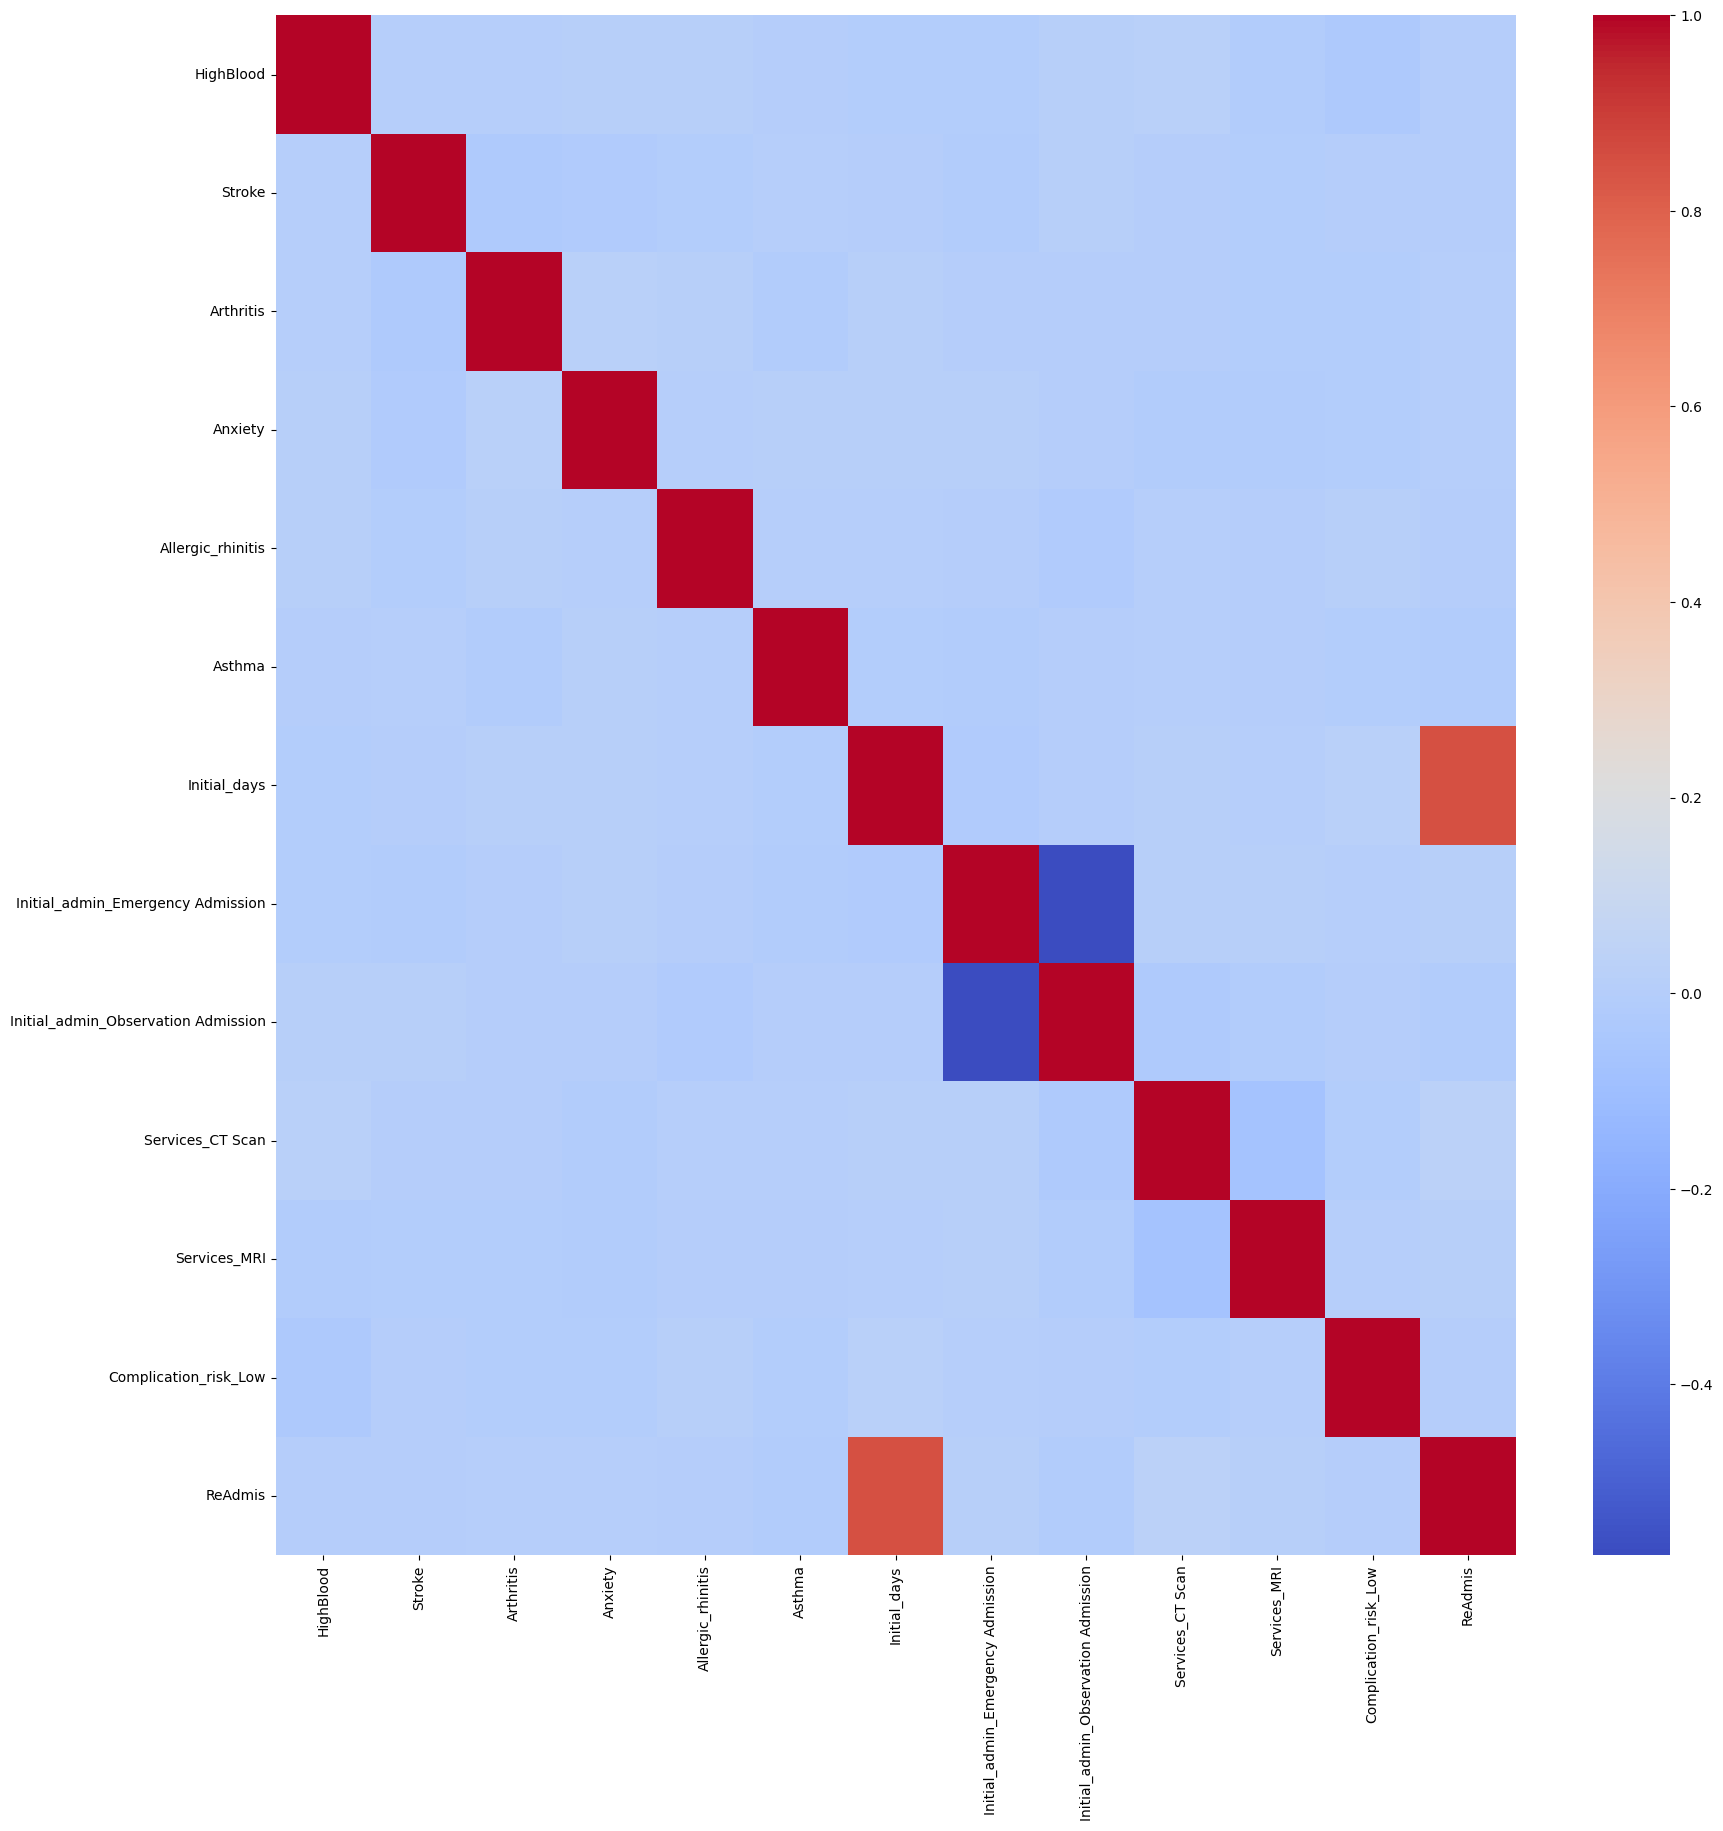

In [302]:
plt.figure(figsize=(20,20))
sns.heatmap(data=pd.concat([X_train_update,y],axis=1).corr(),cmap="coolwarm")

In [303]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
X_train_sm_reduced = sm.add_constant(X_train_reduced)
model_sm = sm.Logit(y_train.to_numpy(), X_train_sm_reduced).fit()
print(model_sm.summary())


Optimization terminated successfully.
         Current function value: 0.033626
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7361
Model:                          Logit   Df Residuals:                     7348
Method:                           MLE   Df Model:                           12
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.9489
Time:                        18:55:26   Log-Likelihood:                -247.52
converged:                       True   LL-Null:                       -4844.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -79.6744      5.103

In [304]:
#identify coefficients to create model equation using for loop
coefficients = model_sm.params
intercept = coefficients[0]
equation = f"ReAdmission = {intercept:.4f}"
for i, coef in enumerate(coefficients[1:], 1):
     equation += f" + {coef:.4f} * {X_train_sm_reduced.columns[i]}"
print(equation)

ReAdmission = -79.6744 + 0.7782 * HighBlood + 1.4462 * Stroke + -1.4025 * Arthritis + -1.0323 * Anxiety + -0.5469 * Allergic_rhinitis + -1.3521 * Asthma + 1.4586 * Initial_days + 2.3513 * Initial_admin_Emergency Admission + 0.7544 * Initial_admin_Observation Admission + 1.6308 * Services_CT Scan + 2.5836 * Services_MRI + -1.5726 * Complication_risk_Low


<ipython-input-304-56617302e042>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coefficients[0]


In [305]:
coefficients = model_sm.params
odds_ratios = np.exp(coefficients)

# Print the odds ratios
for feature, odds_ratio in zip(X_train_sm_reduced.columns, odds_ratios):
    print(f"Odds ratio for {feature}: {odds_ratio:.4f}")

Odds ratio for const: 0.0000
Odds ratio for HighBlood: 2.1776
Odds ratio for Stroke: 4.2470
Odds ratio for Arthritis: 0.2460
Odds ratio for Anxiety: 0.3562
Odds ratio for Allergic_rhinitis: 0.5788
Odds ratio for Asthma: 0.2587
Odds ratio for Initial_days: 4.2999
Odds ratio for Initial_admin_Emergency Admission: 10.4995
Odds ratio for Initial_admin_Observation Admission: 2.1263
Odds ratio for Services_CT Scan: 5.1080
Odds ratio for Services_MRI: 13.2449
Odds ratio for Complication_risk_Low: 0.2075


Reduced Model Training Accuracy Score: 0.9861431870669746
Reduced Model Testing Accuracy Score: 0.9820749592612711
Reduced Model Training F1 Score: 0.9812016218208626
Reduced Model Testing F1 Score: 0.9755374351371386
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1168
           1       0.97      0.98      0.98       673

    accuracy                           0.98      1841
   macro avg       0.98      0.98      0.98      1841
weighted avg       0.98      0.98      0.98      1841



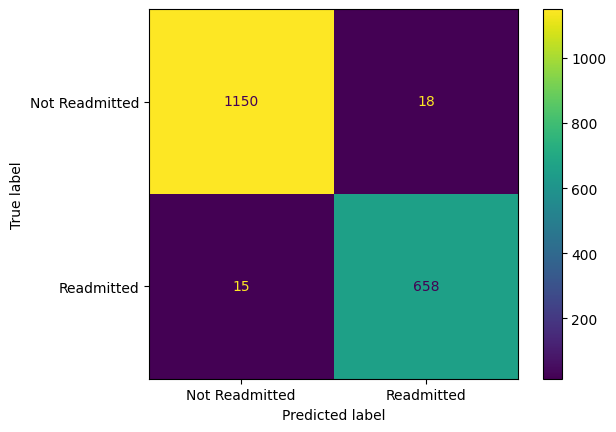

In [306]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)
y_train_reduced_pred = reduced_model.predict(X_train_reduced)
y_test_reduced_pred = reduced_model.predict(X_test_reduced)
print('Reduced Model Training Accuracy Score:', accuracy_score(y_train, y_train_reduced_pred))
print('Reduced Model Testing Accuracy Score:', accuracy_score(y_test, y_test_reduced_pred))
print('Reduced Model Training F1 Score:', f1_score(y_train, y_train_reduced_pred))
print('Reduced Model Testing F1 Score:', f1_score(y_test, y_test_reduced_pred))
cm = confusion_matrix(y_test, y_test_reduced_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=("Not Readmitted","Readmitted"))
disp.plot()
cr = classification_report(y_test, y_test_reduced_pred)
print(cr)

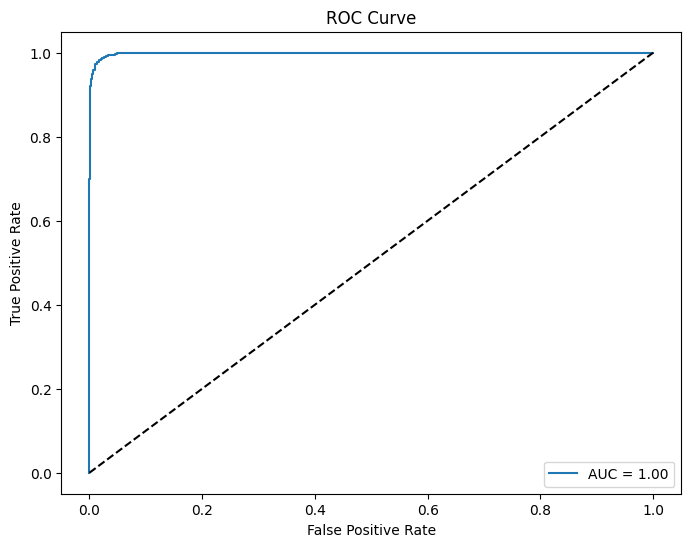

In [307]:
# prompt: make ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_pred_proba = reduced_model.predict_proba(X_test_reduced)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()